In [1]:
import pandas as pd

# Load the dataset
file_path = 'diabetes_CDC.csv'
d_df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(d_df.head())
d_df.columns
d_df.shape[1]

   HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  HeartDiseaseorAttack  \
0       1         1          1   40       1       0                     0   
1       0         0          0   25       1       0                     0   
2       1         1          1   28       0       0                     0   
3       1         0          1   27       0       0                     0   
4       1         1          1   24       0       0                     0   

   PhysActivity  Fruits  Veggies  ...  NoDocbcCost  GenHlth  MentHlth  \
0             0       0        1  ...            0        5        18   
1             1       0        0  ...            1        3         0   
2             0       1        0  ...            1        5        30   
3             1       1        1  ...            0        2         0   
4             1       1        1  ...            0        2         3   

   PhysHlth  DiffWalk  Sex  Age  Education  Income  target  
0        15         1    0    9      

22

In [2]:
# Check for missing values
missing_values_count = d_df.isnull().sum()
print("Missing values count:")
print(missing_values_count)

# Filter columns with missing values > 0
missing_columns = missing_values_count[missing_values_count > 0]

# Print columns with missing values > 0
if not missing_columns.empty:
    print("Columns with missing values:")
    print(missing_columns)
else:
    print("No missing values found in any column.")


Missing values count:
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
target                  0
dtype: int64
No missing values found in any column.


In [3]:
# Get the data types of all variables
variable_types = d_df.dtypes

# Print the data types
print("Data types of all variables:")
print(variable_types)

# Binary variables represented as integers (0 or 1) can be used as int type.
# Converting Catrgorical Variable types from int to category

# Convert ordinal variables to categorical factors
d_df['MentHlth'] = d_df['MentHlth'].astype('category')
d_df['PhysHlth'] = d_df['PhysHlth'].astype('category')
d_df['Education'] = d_df['Education'].astype('category')
d_df['Income'] = d_df['Income'].astype('category')
d_df['Age'] = d_df['Age'].astype('category')
# Replace values in 'GenHlth' column with their inverses
d_df['GenHlth'] = d_df['GenHlth'].replace({1: 5, 2: 4, 3: 3, 4: 2, 5: 1})

# Display the modified 'GenHlth' column
print(d_df['GenHlth'])

print(d_df['GenHlth'].head())
d_df['GenHlth'] = d_df['GenHlth'].astype('category')

# Display the first few rows of the dataset
print(d_df.head())



Data types of all variables:
HighBP                  int64
HighChol                int64
CholCheck               int64
BMI                     int64
Smoker                  int64
Stroke                  int64
HeartDiseaseorAttack    int64
PhysActivity            int64
Fruits                  int64
Veggies                 int64
HvyAlcoholConsump       int64
AnyHealthcare           int64
NoDocbcCost             int64
GenHlth                 int64
MentHlth                int64
PhysHlth                int64
DiffWalk                int64
Sex                     int64
Age                     int64
Education               int64
Income                  int64
target                  int64
dtype: object
0         1
1         3
2         1
3         4
4         4
         ..
253675    3
253676    2
253677    5
253678    3
253679    4
Name: GenHlth, Length: 253680, dtype: int64
0    1
1    3
2    1
3    4
4    4
Name: GenHlth, dtype: int64
   HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  Heart

In [4]:
# Get the data types of all variables
variable_types = d_df.dtypes

# Print the data types
print("Data types of all variables:")
print(variable_types)
print(d_df['GenHlth'])

Data types of all variables:
HighBP                     int64
HighChol                   int64
CholCheck                  int64
BMI                        int64
Smoker                     int64
Stroke                     int64
HeartDiseaseorAttack       int64
PhysActivity               int64
Fruits                     int64
Veggies                    int64
HvyAlcoholConsump          int64
AnyHealthcare              int64
NoDocbcCost                int64
GenHlth                 category
MentHlth                category
PhysHlth                category
DiffWalk                   int64
Sex                        int64
Age                     category
Education               category
Income                  category
target                     int64
dtype: object
0         1
1         3
2         1
3         4
4         4
         ..
253675    3
253676    2
253677    5
253678    3
253679    4
Name: GenHlth, Length: 253680, dtype: category
Categories (5, int64): [1, 2, 3, 4, 5]


In [5]:
# Get unique values of the target variable
unique_targets = d_df['target'].unique()

# Print the unique values
print("Unique values of the target variable:")
print(unique_targets)


Unique values of the target variable:
[0 1]


---CORRELATIONS---
                        HighBP  HighChol  CholCheck       BMI    Smoker  \
HighBP                1.000000  0.298199   0.098508  0.213748  0.096991   
HighChol              0.298199  1.000000   0.085642  0.106722  0.091299   
CholCheck             0.098508  0.085642   1.000000  0.034495 -0.009929   
BMI                   0.213748  0.106722   0.034495  1.000000  0.013804   
Smoker                0.096991  0.091299  -0.009929  0.013804  1.000000   
Stroke                0.129575  0.092620   0.024158  0.020153  0.061173   
HeartDiseaseorAttack  0.209361  0.180765   0.044206  0.052904  0.114441   
PhysActivity         -0.125267 -0.078046   0.004190 -0.147294 -0.087401   
Fruits               -0.040555 -0.040859   0.023849 -0.087518 -0.077666   
Veggies              -0.061266 -0.039874   0.006121 -0.062275 -0.030678   
HvyAlcoholConsump    -0.003972 -0.011543  -0.023730 -0.048736  0.101619   
AnyHealthcare         0.038425  0.042230   0.117626 -0.018471 -0.023251   
NoDocb

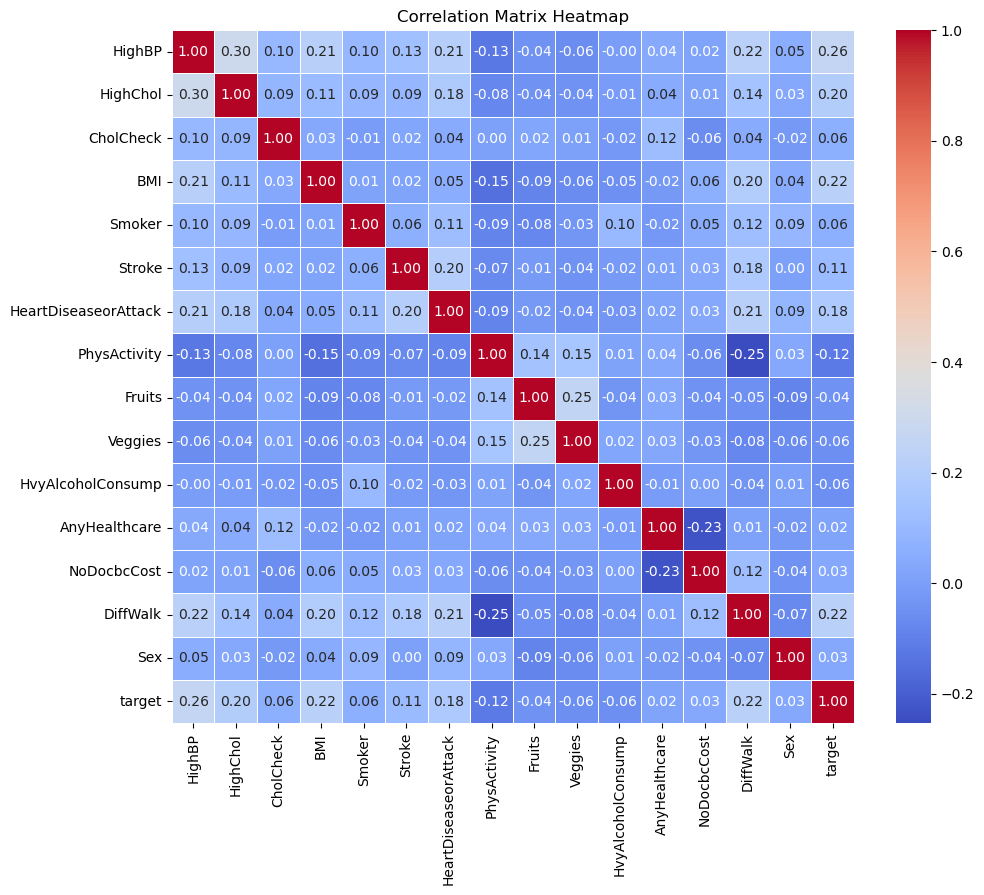

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Compute the correlation matrix
corr = d_df.corr(numeric_only=True)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool_))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
x = sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Show Plot
print("---CORRELATIONS---")
print(corr)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [7]:
# Compute the correlation matrix
corr = d_df.corr(numeric_only=True)

# Get the correlation values with the target variable
target_corr = corr['target'].drop('target')

# Print the correlation values with the target variable
print("Correlation with target variable:")
print(target_corr)

Correlation with target variable:
HighBP                  0.263129
HighChol                0.200276
CholCheck               0.064761
BMI                     0.216843
Smoker                  0.060789
Stroke                  0.105816
HeartDiseaseorAttack    0.177282
PhysActivity           -0.118133
Fruits                 -0.040779
Veggies                -0.056584
HvyAlcoholConsump      -0.057056
AnyHealthcare           0.016255
NoDocbcCost             0.031433
DiffWalk                0.218344
Sex                     0.031430
Name: target, dtype: float64


In [11]:
from sklearn.feature_selection import VarianceThreshold

# Create a VarianceThreshold object with a threshold
selector = VarianceThreshold(threshold=0.1)

# Fit and transform the data to remove low variance features
X_high_variance = selector.fit_transform(d_df.drop(columns=['target']))

# Get the names of the selected features
selected_features = d_df.drop(columns=['target']).columns[selector.get_support()]


# Print the total number of features
total_features = len(d_df.drop(columns=['target']).columns)
print("Total features:", total_features)

# Print the count of selected features
selected_features_count = len(selected_features)
print("Number of selected features after applying low variance filter:", selected_features_count)

# Print the selected features
print("Selected features after applying low variance filter:")
print(selected_features)


Total features: 21
Number of selected features after applying low variance filter: 15
Selected features after applying low variance filter:
Index(['HighBP', 'HighChol', 'BMI', 'Smoker', 'PhysActivity', 'Fruits',
       'Veggies', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age',
       'Education', 'Income'],
      dtype='object')


In [12]:
from sklearn.feature_selection import VarianceThreshold

# Create a VarianceThreshold object with a threshold
selector = VarianceThreshold(threshold=0.5)

# Fit and transform the data to remove low variance features
X_high_variance = selector.fit_transform(d_df.drop(columns=['target']))

# Get the names of the selected features
selected_features = d_df.drop(columns=['target']).columns[selector.get_support()]


# Print the total number of features
total_features = len(d_df.drop(columns=['target']).columns)
print("Total features:", total_features)

# Print the count of selected features
selected_features_count = len(selected_features)
print("Number of selected features after applying low variance filter:", selected_features_count)

# Print the selected features
print("Selected features after applying low variance filter:")
print(selected_features)


Total features: 21
Number of selected features after applying low variance filter: 7
Selected features after applying low variance filter:
Index(['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income'], dtype='object')


In [14]:
# Feature selection using SelectFromModel with RandomForestClassifier
# This method selects features based on their importance as determined by a Random Forest Classifier.

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
#from sklearn.linear_model import LogisticRegression

# Define your dataset (features and target)
feat = d_df.drop(columns=['target'])
tar = d_df['target']

# Create a Logistic Regression model
clf = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=3, criterion='entropy', random_state=50)

#LogisticRegression(max_iter=1000, random_state=50)

# Create the SelectFromModel object
sel = SelectFromModel(estimator=clf, prefit=False, threshold='mean')

# Fit the SelectFromModel object to the dataset
sel.fit(feat, tar)

# Get the names of the selected features
selected_features = feat.columns[sel.get_support()]

# Print the selected features
print("Selected features using SelectFromModel with Random Forest Classifier:")
print("Total features:", len(feat.columns))
print("Number of selected features:", len(selected_features))
print(selected_features)

Selected features using SelectFromModel with Random Forest Classifier:
Total features: 21
Number of selected features: 8
Index(['HighBP', 'BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education',
       'Income'],
      dtype='object')


In [17]:

# Assigning features based on the two feature selection methods
selected_features_rf = ['HighBP', 'BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']
selected_features_lv = ['HighBP', 'HighChol', 'BMI', 'Smoker', 'PhysActivity', 'Fruits',
                        'Veggies', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age',
                        'Education', 'Income']


In [18]:
#Desciprtive Statistics
import pandas as pd

# Select the subset of data containing only the selected features
selected_features_data = d_df[selected_features_rf]
print(selected_features_data.dtypes)



HighBP          int64
BMI             int64
GenHlth      category
MentHlth     category
PhysHlth     category
Age          category
Education    category
Income       category
dtype: object


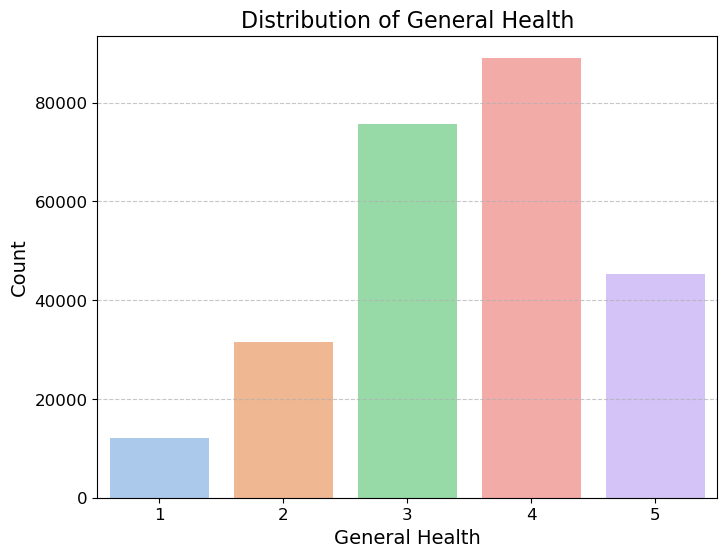

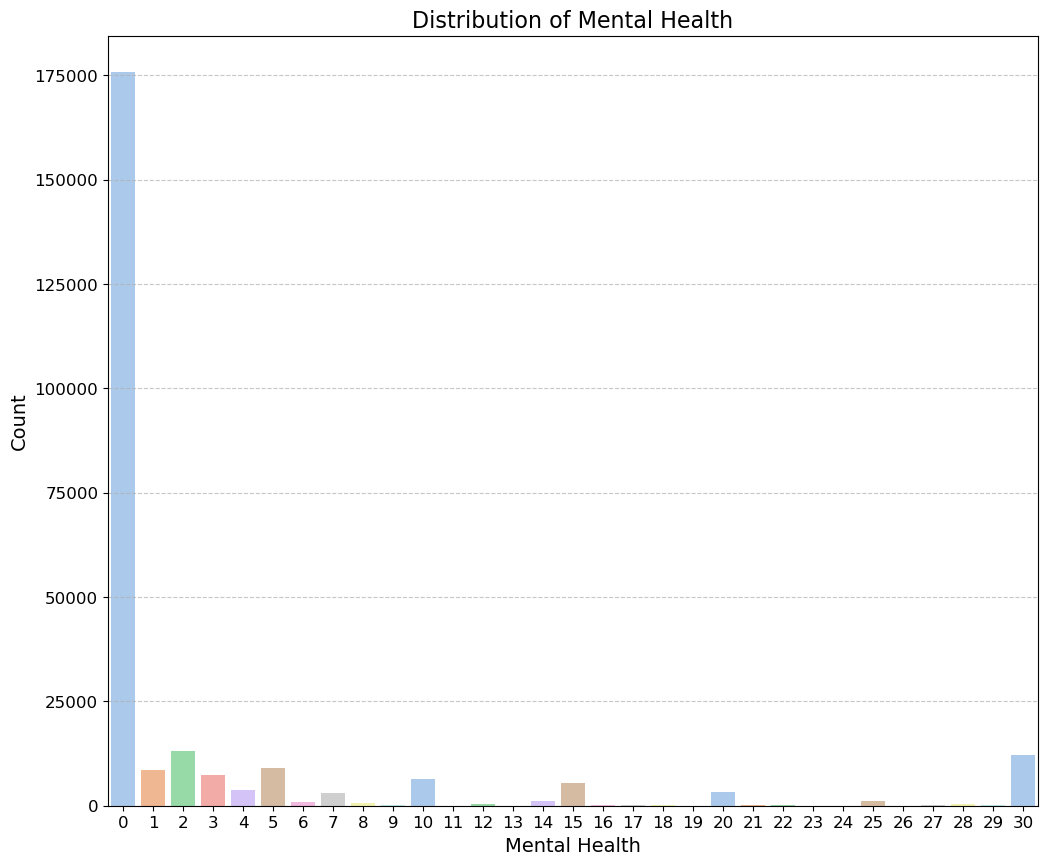

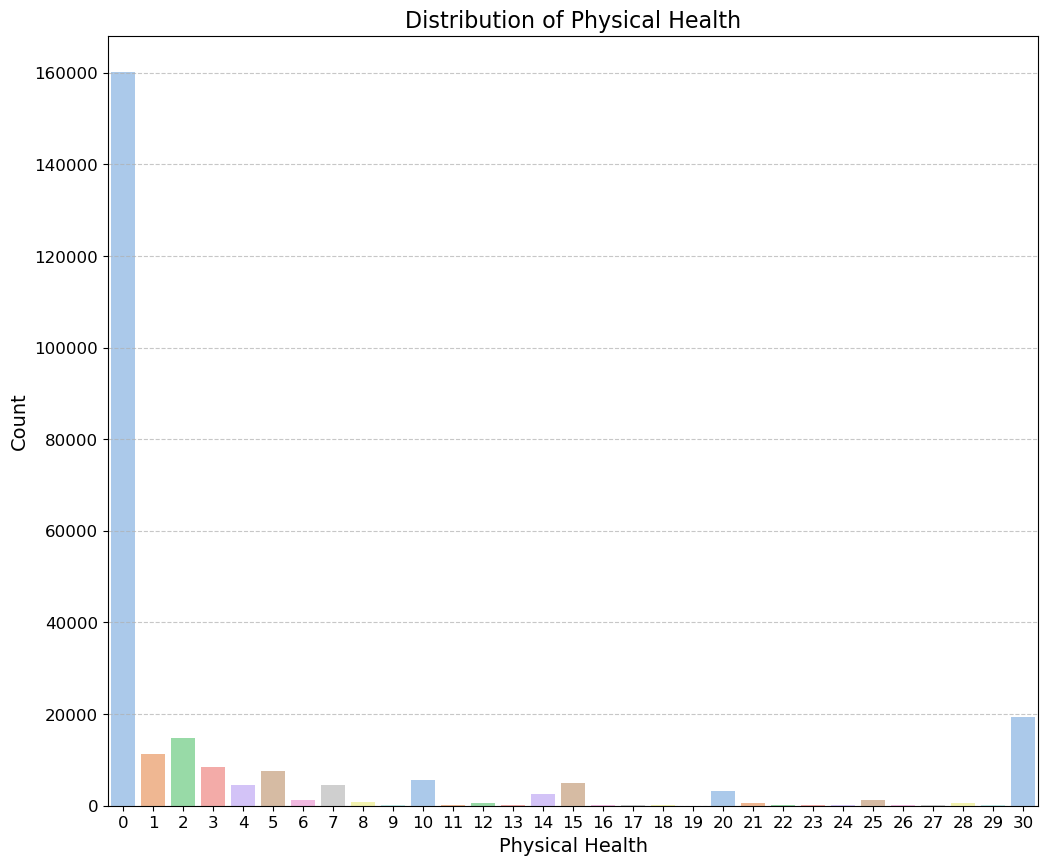

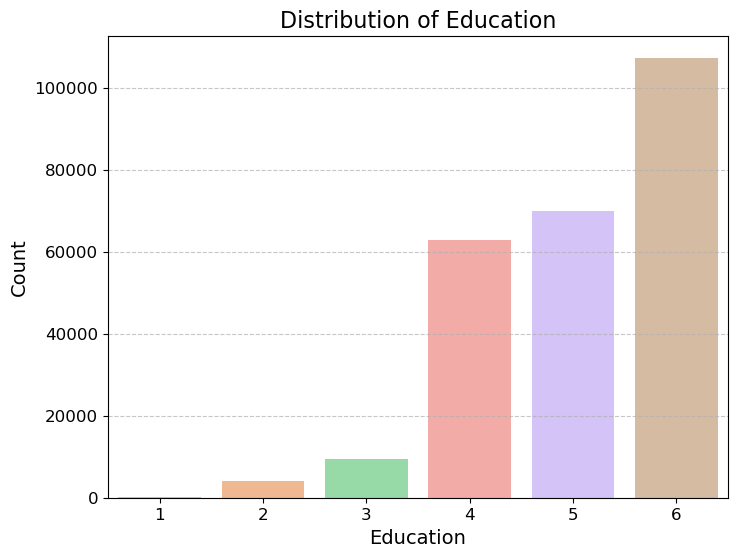

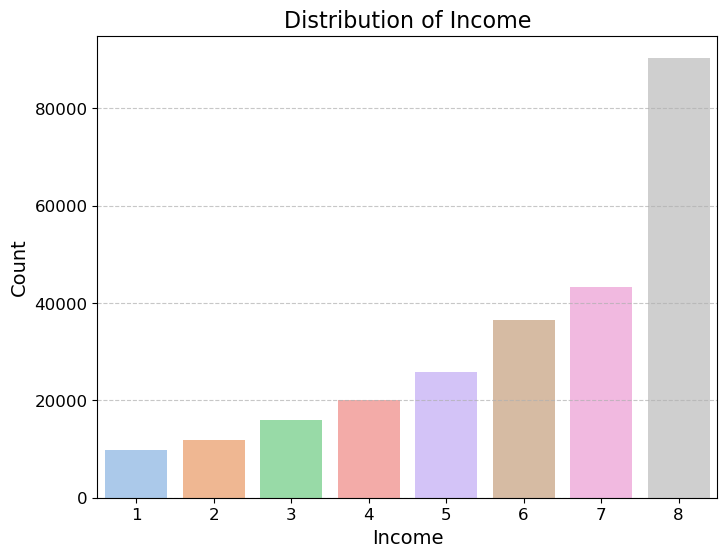

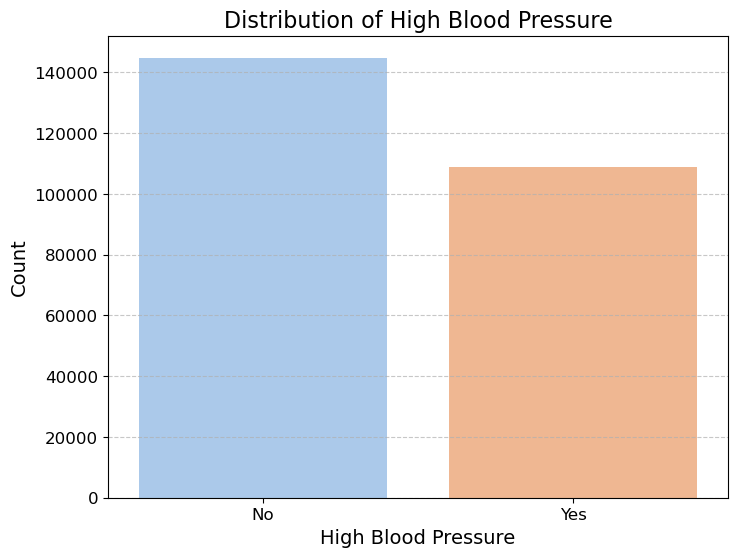

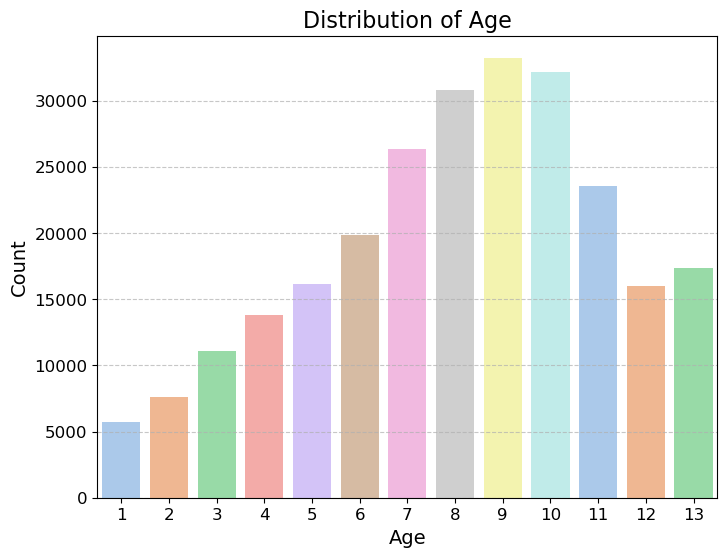

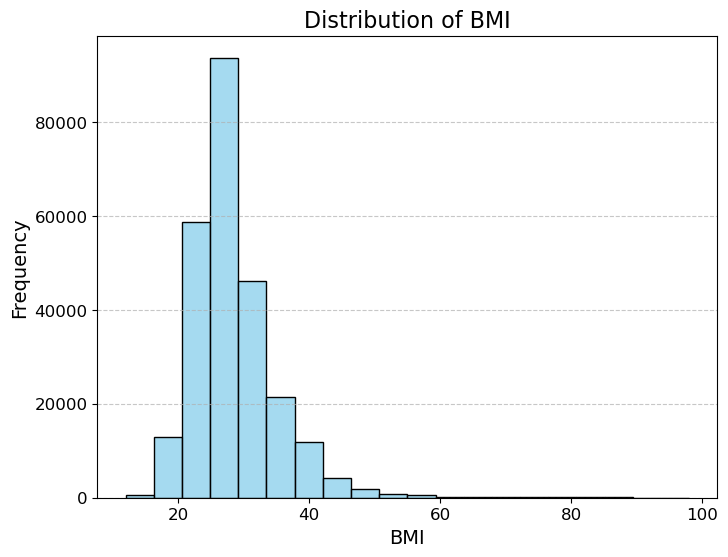

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot bar plot for 'GenHlth'
plt.figure(figsize=(8, 6))
sns.countplot(x='GenHlth', data=selected_features_data, palette='pastel')
plt.title('Distribution of General Health', fontsize=16)
plt.xlabel('General Health', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot bar plot for 'MentHlth'
plt.figure(figsize=(12, 10))
sns.countplot(x='MentHlth', data=selected_features_data, palette='pastel')
plt.title('Distribution of Mental Health', fontsize=16)
plt.xlabel('Mental Health', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot bar plot for 'PhysHlth'
plt.figure(figsize=(12, 10))
sns.countplot(x='PhysHlth', data=selected_features_data, palette='pastel')
plt.title('Distribution of Physical Health', fontsize=16)
plt.xlabel('Physical Health', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot bar plot for 'Education'
plt.figure(figsize=(8, 6))
sns.countplot(x='Education', data=selected_features_data, palette='pastel')
plt.title('Distribution of Education', fontsize=16)
plt.xlabel('Education', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot bar plot for 'Income'
plt.figure(figsize=(8, 6))
sns.countplot(x='Income', data=selected_features_data, palette='pastel')
plt.title('Distribution of Income', fontsize=16)
plt.xlabel('Income', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Plot bar plot for 'HighBP'
plt.figure(figsize=(8, 6))
sns.countplot(x='HighBP', data=selected_features_data, palette='pastel')
plt.title('Distribution of High Blood Pressure', fontsize=16)
plt.xlabel('High Blood Pressure', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks([0, 1], ['No', 'Yes'], fontsize=12)  # Replace 0 and 1 with labels
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Plot bar plot for 'Age'
plt.figure(figsize=(8, 6))
sns.countplot(x='Age', data=selected_features_data, palette='pastel')
plt.title('Distribution of Age', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot histogram for 'BMI'
plt.figure(figsize=(8, 6))
sns.histplot(data=selected_features_data, x='BMI', bins=20, color='skyblue')
plt.title('Distribution of BMI', fontsize=16)
plt.xlabel('BMI', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [32]:
# Step 3: Split the Data Train and Test

from sklearn.model_selection import train_test_split
# all features

# Separate features and target
diabetes_X = d_df.drop(columns=['target'])
print(diabetes_X.columns)
diabetes_Y = d_df['target'] 
print(diabetes_Y.head())

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(diabetes_X, diabetes_Y, test_size=0.2, random_state=55)
# Display the shape of the training and testing sets
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

# selected_features_rf
# Separate features and target
rf_X = d_df[selected_features_rf]
print(rf_X.columns)
rf_Y = d_df['target'] 
print(rf_Y.head())

# Split the data into training and testing sets
X_train_rf, X_test_rf, Y_train_rf, Y_test_rf = train_test_split(rf_X, rf_Y, test_size=0.2, random_state=55)
# Display the shape of the training and testing sets
print(X_train_rf.shape, X_test_rf.shape, Y_train_rf.shape, Y_test_rf.shape)

# selected_features_lv
# Separate features and target
lv_X = d_df[selected_features_lv]
print(lv_X.columns)
lv_Y = d_df['target'] 
print(lv_Y.head())

# Split the data into training and testing sets
X_train_lv, X_test_lv, Y_train_lv, Y_test_lv = train_test_split(lv_X, lv_Y, test_size=0.2, random_state=55)
# Display the shape of the training and testing sets
print(X_train_lv.shape, X_test_lv.shape, Y_train_lv.shape, Y_test_lv.shape)



Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')
0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64
(202944, 21) (50736, 21) (202944,) (50736,)
Index(['HighBP', 'BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education',
       'Income'],
      dtype='object')
0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64
(202944, 8) (50736, 8) (202944,) (50736,)
Index(['HighBP', 'HighChol', 'BMI', 'Smoker', 'PhysActivity', 'Fruits',
       'Veggies', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age',
       'Education', 'Income'],
      dtype='object')
0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64
(202944, 15) (50736, 15) (202944,) (50736,)


In [ ]:
# Modelling
# Logistic Regression on three sets of features

# all features

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


# Initialize the logistic regression model
logreg_all = LogisticRegression(max_iter=10000)

# Train the model on the training data
logreg_all.fit(X_train, Y_train)

# Predict on the testing data
Y_pred_all = logreg_all.predict(X_test)

# For all features
accuracy_all = accuracy_score(Y_test, Y_pred_all)
precision_all = precision_score(Y_test, Y_pred_all)
recall_all = recall_score(Y_test, Y_pred_all)
f1_all = f1_score(Y_test, Y_pred_all)
confusion_matrix_all = confusion_matrix(Y_test, Y_pred_all)


print("For all features:")
print("Accuracy:", accuracy_all)
print("Precision:", precision_all)
print("Recall:", recall_all)
print("F1 Score:", f1_all)

# Define index and columns labels
class_labels = ['Class 0', 'Class 1']  # Update with your actual class labels

# Create a DataFrame for the confusion matrix
confusion_df = pd.DataFrame(confusion_matrix_all, index=class_labels, columns=class_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_df)

#----------------------------------------------------------------------------------------------



# selected_features_rf

# Initialize the logistic regression model
logreg_rf = LogisticRegression(max_iter=10000)

# Train the model on the training data
logreg_rf.fit(X_train_rf, Y_train_rf)

# Predict on the testing data
Y_pred_rf = logreg_rf.predict(X_test_rf)

# For selected features using Random Forest
accuracy_rf = accuracy_score(Y_test_rf, Y_pred_rf)
precision_rf = precision_score(Y_test_rf, Y_pred_rf)
recall_rf = recall_score(Y_test_rf, Y_pred_rf)
f1_rf = f1_score(Y_test_rf, Y_pred_rf)
confusion_matrix_rf = confusion_matrix(Y_test_rf, Y_pred_rf)

print("\nFor selected features using Random Forest:")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)
# Define index and columns labels
class_labels = ['Class 0', 'Class 1']  # Update with your actual class labels

# Create a DataFrame for the confusion matrix
confusion_df = pd.DataFrame(confusion_matrix_rf, index=class_labels, columns=class_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_df)

#----------------------------------------------------------------------------------------------

# selected_features_lv

# Initialize the logistic regression model
logreg_lv = LogisticRegression(max_iter=10000)

# Train the model on the training data
logreg_lv.fit(X_train_lv, Y_train_lv)

# Predict on the testing data
Y_pred_lv = logreg_lv.predict(X_test_lv)

# For selected features using low variance
accuracy_lv = accuracy_score(Y_test_lv, Y_pred_lv)
precision_lv = precision_score(Y_test_lv, Y_pred_lv)
recall_lv = recall_score(Y_test_lv, Y_pred_lv)
f1_lv = f1_score(Y_test_lv, Y_pred_lv)
confusion_matrix_lv = confusion_matrix(Y_test_lv, Y_pred_lv)

print("\nFor selected features using low variance:")
print("Accuracy:", accuracy_lv)
print("Precision:", precision_lv)
print("Recall:", recall_lv)
print("F1 Score:", f1_lv)

# Define index and columns labels
class_labels = ['Class 0', 'Class 1']  # Update with your actual class labels

# Create a DataFrame for the confusion matrix
confusion_df = pd.DataFrame(confusion_matrix_lv, index=class_labels, columns=class_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_df)


In [25]:
# Checking for class imbalance

# Calculate the proportion of each class in the target variable
class_counts = d_df['target'].value_counts()
class_proportions = class_counts / class_counts.sum()

# Print the class proportions
print("Class Proportions:")
print(class_proportions)
print(class_counts)

Class Proportions:
0    0.860667
1    0.139333
Name: target, dtype: float64
0    218334
1     35346
Name: target, dtype: int64


In [ ]:
#!pip install --upgrade imbalanced-learn scikit-learn
#pip install -U scikit-learn imbalanced-learn


In [21]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


In [33]:
#Resampling using SMOTE to avoid class imbalance
# Apply SMOTE to the training data only

# all features
smote = SMOTE(random_state=55)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)
print(X_train.shape, Y_train.shape, X_train_resampled.shape,Y_train_resampled.shape)

# Checking the Resampled Counts

import pandas as pd

# Assuming X_train_resampled and Y_train_resampled are NumPy arrays or pandas DataFrames/Series
# Convert them to pandas DataFrame/Series if they are not already

# Convert to DataFrame if they are numpy arrays
X_train_resampled_df = pd.DataFrame(X_train_resampled, columns=X_train.columns)
# Convert to Series if they are numpy arrays
Y_train_resampled_series = pd.Series(Y_train_resampled)

# Create a DataFrame with X_train_resampled and Y_train_resampled
resampled_df = pd.concat([X_train_resampled_df, Y_train_resampled_series], axis=1)

# Calculate the proportion of each class in the target variable for resampled data
resampled_class_counts = resampled_df['target'].value_counts()
resampled_class_proportions = resampled_class_counts / resampled_class_counts.sum()

# Print the class counts and proportions for resampled data
print("Resampled Class Counts:")
print(resampled_class_counts)
print("\nResampled Class Proportions:")
print(resampled_class_proportions)

# rf
# Apply SMOTE to the training data only
smote = SMOTE(random_state=55)
X_train_rf_resampled, Y_train_rf_resampled = smote.fit_resample(X_train_rf, Y_train_rf)
print(X_train_rf.shape, Y_train_rf.shape, X_train_rf_resampled.shape,Y_train_rf_resampled.shape)

#lv
# Apply SMOTE to the training data only
smote = SMOTE(random_state=55)
X_train_lv_resampled, Y_train_lv_resampled = smote.fit_resample(X_train_lv, Y_train_lv)
print(X_train_lv.shape, Y_train_lv.shape, X_train_lv_resampled.shape,Y_train_lv_resampled.shape)


(202944, 21) (202944,) (349376, 21) (349376,)
Resampled Class Counts:
0    174688
1    174688
Name: target, dtype: int64

Resampled Class Proportions:
0    0.5
1    0.5
Name: target, dtype: float64
(202944, 8) (202944,) (349376, 8) (349376,)
(202944, 15) (202944,) (349376, 15) (349376,)


In [36]:
# Logistic Regression on resampled data

# all features

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Initialize the logistic regression model
logreg_all_resampled = LogisticRegression(max_iter=10000)

# Train the model on the resampled training data
logreg_all_resampled.fit(X_train_resampled, Y_train_resampled)

# Predict on the testing data
Y_pred_all_resampled = logreg_all_resampled.predict(X_test)

# For all features using resampled data
accuracy_all_resampled = accuracy_score(Y_test, Y_pred_all_resampled)
precision_all_resampled = precision_score(Y_test, Y_pred_all_resampled)
recall_all_resampled = recall_score(Y_test, Y_pred_all_resampled)
f1_all_resampled = f1_score(Y_test, Y_pred_all_resampled)
confusion_matrix_all_resampled = confusion_matrix(Y_test, Y_pred_all_resampled)

print("For all features using resampled data:")
print("Accuracy:", accuracy_all_resampled)
print("Precision:", precision_all_resampled)
print("Recall:", recall_all_resampled)
print("F1 Score:", f1_all_resampled)

# Define index and columns labels
class_labels = ['Class 0', 'Class 1']  # Update with your actual class labels

# Create a DataFrame for the confusion matrix
confusion_df = pd.DataFrame(confusion_matrix_all_resampled, index=class_labels, columns=class_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_df)

#----------------------------------------------------------------------------------------------



# selected_features_rf

# Initialize the logistic regression model
logreg_rf_resampled = LogisticRegression(max_iter=10000)

# Train the model on the resampled training data with selected features
logreg_rf_resampled.fit(X_train_rf_resampled, Y_train_rf_resampled)

# Predict on the testing data with selected features
Y_pred_rf_resampled = logreg_rf_resampled.predict(X_test_rf)

# For selected features using Random Forest with resampled data
accuracy_rf_resampled = accuracy_score(Y_test_rf, Y_pred_rf_resampled)
precision_rf_resampled = precision_score(Y_test_rf, Y_pred_rf_resampled)
recall_rf_resampled = recall_score(Y_test_rf, Y_pred_rf_resampled)
f1_rf_resampled = f1_score(Y_test_rf, Y_pred_rf_resampled)
confusion_matrix_rf_resampled = confusion_matrix(Y_test_rf, Y_pred_rf_resampled)

print("\nFor selected features using Random Forest with resampled data:")
print("Accuracy:", accuracy_rf_resampled)
print("Precision:", precision_rf_resampled)
print("Recall:", recall_rf_resampled)
print("F1 Score:", f1_rf_resampled)

# Define index and columns labels
class_labels = ['Class 0', 'Class 1']  # Update with your actual class labels

# Create a DataFrame for the confusion matrix
confusion_df = pd.DataFrame(confusion_matrix_rf_resampled, index=class_labels, columns=class_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_df)

#----------------------------------------------------------------------------------------------

# selected_features_lv

# Initialize the logistic regression model
logreg_lv_resampled = LogisticRegression(max_iter=10000)

# Train the model on the resampled training data with selected features
logreg_lv_resampled.fit(X_train_lv_resampled, Y_train_lv_resampled)

# Predict on the testing data with selected features
Y_pred_lv_resampled = logreg_lv_resampled.predict(X_test_lv)

# For selected features using low variance with resampled data
accuracy_lv_resampled = accuracy_score(Y_test_lv, Y_pred_lv_resampled)
precision_lv_resampled = precision_score(Y_test_lv, Y_pred_lv_resampled)
recall_lv_resampled = recall_score(Y_test_lv, Y_pred_lv_resampled)
f1_lv_resampled = f1_score(Y_test_lv, Y_pred_lv_resampled)
confusion_matrix_lv_resampled = confusion_matrix(Y_test_lv, Y_pred_lv_resampled)

print("\nFor selected features using low variance with resampled data:")
print("Accuracy:", accuracy_lv_resampled)
print("Precision:", precision_lv_resampled)
print("Recall:", recall_lv_resampled)
print("F1 Score:", f1_lv_resampled)

# Define index and columns labels
class_labels = ['Class 0', 'Class 1']  # Update with your actual class labels

# Create a DataFrame for the confusion matrix
confusion_df = pd.DataFrame(confusion_matrix_lv_resampled, index=class_labels, columns=class_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_df)


For all features using resampled data:
Accuracy: 0.7431803847366761
Precision: 0.30527143981117233
Recall: 0.6566995768688293
F1 Score: 0.4167934831259511
Confusion Matrix:
         Class 0  Class 1
Class 0    33050    10596
Class 1     2434     4656

For selected features using Random Forest with resampled data:
Accuracy: 0.7330889309366131
Precision: 0.30737998566993074
Recall: 0.7260930888575459
F1 Score: 0.4319154291467405
Confusion Matrix:
         Class 0  Class 1
Class 0    32046    11600
Class 1     1942     5148

For selected features using low variance with resampled data:
Accuracy: 0.7377010406811731
Precision: 0.30414514300113393
Recall: 0.6809590973201692
F1 Score: 0.42048423619578473
Confusion Matrix:
         Class 0  Class 1
Class 0    32600    11046
Class 1     2262     4828


In [39]:
# Best model of the above three

# Comparing models based on evaluation metrics

# Create a dictionary to store evaluation metrics for each model
models_evaluation = {
    'all_features': {'accuracy': accuracy_all_resampled, 'precision': precision_all_resampled, 
                     'recall': recall_all_resampled, 'f1_score': f1_all_resampled},
    'selected_features_rf': {'accuracy': accuracy_rf_resampled, 'precision': precision_rf_resampled, 
                             'recall': recall_rf_resampled, 'f1_score': f1_rf_resampled},
    'selected_features_lv': {'accuracy': accuracy_lv_resampled, 'precision': precision_lv_resampled, 
                             'recall': recall_lv_resampled, 'f1_score': f1_lv_resampled}
}

# Print evaluation metrics for each model
for model, metrics in models_evaluation.items():
    print(f"\nEvaluation metrics for {model}:")
    print("Accuracy:", metrics['accuracy'])
    print("Precision:", metrics['precision'])
    print("Recall:", metrics['recall'])
    print("F1 Score:", metrics['f1_score'])
# Assign weights to evaluation metrics (you can adjust these weights based on your preference)
weights = {'accuracy': 1, 'precision': 1, 'recall': 1, 'f1_score': 1}

# Calculate weighted sums for each model
weighted_sums = {}
for model, metrics in models_evaluation.items():
    weighted_sum = sum(metrics[metric] * weights[metric] for metric in metrics)
    weighted_sums[model] = weighted_sum

# Rank the models based on their weighted sums (higher sum is better)
ranked_models = sorted(weighted_sums, key=weighted_sums.get, reverse=True)

# Print the ranked models
print("\nRanked models based on overall performance:")
for i, model in enumerate(ranked_models, start=1):
    print(f"{i}. {model} (Weighted Sum: {weighted_sums[model]})")



Evaluation metrics for all_features:
Accuracy: 0.7431803847366761
Precision: 0.30527143981117233
Recall: 0.6566995768688293
F1 Score: 0.4167934831259511

Evaluation metrics for selected_features_rf:
Accuracy: 0.7330889309366131
Precision: 0.30737998566993074
Recall: 0.7260930888575459
F1 Score: 0.4319154291467405

Evaluation metrics for selected_features_lv:
Accuracy: 0.7377010406811731
Precision: 0.30414514300113393
Recall: 0.6809590973201692
F1 Score: 0.42048423619578473

Ranked models based on overall performance:
1. selected_features_rf (Weighted Sum: 2.19847743461083)
2. selected_features_lv (Weighted Sum: 2.1432895171982613)
3. all_features (Weighted Sum: 2.121944884542629)


In [40]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier

# all features

# Initialize the Decision Tree model
dt_all = DecisionTreeClassifier(random_state=55)

# Train the model on the training data
dt_all.fit(X_train, Y_train)

# Predict on the testing data
Y_pred_all_dt = dt_all.predict(X_test)

# For all features
accuracy_all_dt = accuracy_score(Y_test, Y_pred_all_dt)
precision_all_dt = precision_score(Y_test, Y_pred_all_dt)
recall_all_dt = recall_score(Y_test, Y_pred_all_dt)
f1_all_dt = f1_score(Y_test, Y_pred_all_dt)
confusion_matrix_all_dt = confusion_matrix(Y_test, Y_pred_all_dt)

print("For all features (Decision Tree):")
print("Accuracy:", accuracy_all_dt)
print("Precision:", precision_all_dt)
print("Recall:", recall_all_dt)
print("F1 Score:", f1_all_dt)

# Define index and columns labels
class_labels = ['Class 0', 'Class 1']  # Update with your actual class labels

# Create a DataFrame for the confusion matrix
confusion_df_all_dt = pd.DataFrame(confusion_matrix_all_dt, index=class_labels, columns=class_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_df_all_dt)

#----------------------------------------------------------------------------------------------

# Selected features using Random Forest

# Initialize the Decision Tree model
dt_rf = DecisionTreeClassifier(random_state=55)

# Train the model on the training data
dt_rf.fit(X_train_rf, Y_train_rf)

# Predict on the testing data
Y_pred_rf_dt = dt_rf.predict(X_test_rf)

# For selected features using Random Forest
accuracy_rf_dt = accuracy_score(Y_test_rf, Y_pred_rf_dt)
precision_rf_dt = precision_score(Y_test_rf, Y_pred_rf_dt)
recall_rf_dt = recall_score(Y_test_rf, Y_pred_rf_dt)
f1_rf_dt = f1_score(Y_test_rf, Y_pred_rf_dt)
confusion_matrix_rf_dt = confusion_matrix(Y_test_rf, Y_pred_rf_dt)

print("\nFor selected features using Random Forest (Decision Tree):")
print("Accuracy:", accuracy_rf_dt)
print("Precision:", precision_rf_dt)
print("Recall:", recall_rf_dt)
print("F1 Score:", f1_rf_dt)

# Define index and columns labels
class_labels = ['Class 0', 'Class 1']  # Update with your actual class labels

# Create a DataFrame for the confusion matrix
confusion_df_rf_dt = pd.DataFrame(confusion_matrix_rf_dt, index=class_labels, columns=class_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_df_rf_dt)

#----------------------------------------------------------------------------------------------

# Selected features using low variance

# Initialize the Decision Tree model
dt_lv = DecisionTreeClassifier(random_state=55)

# Train the model on the training data
dt_lv.fit(X_train_lv, Y_train_lv)

# Predict on the testing data
Y_pred_lv_dt = dt_lv.predict(X_test_lv)

# For selected features using low variance
accuracy_lv_dt = accuracy_score(Y_test_lv, Y_pred_lv_dt)
precision_lv_dt = precision_score(Y_test_lv, Y_pred_lv_dt)
recall_lv_dt = recall_score(Y_test_lv, Y_pred_lv_dt)
f1_lv_dt = f1_score(Y_test_lv, Y_pred_lv_dt)
confusion_matrix_lv_dt = confusion_matrix(Y_test_lv, Y_pred_lv_dt)

print("\nFor selected features using low variance (Decision Tree):")
print("Accuracy:", accuracy_lv_dt)
print("Precision:", precision_lv_dt)
print("Recall:", recall_lv_dt)
print("F1 Score:", f1_lv_dt)

# Define index and columns labels
class_labels = ['Class 0', 'Class 1']  # Update with your actual class labels

# Create a DataFrame for the confusion matrix
confusion_df_lv_dt = pd.DataFrame(confusion_matrix_lv_dt, index=class_labels, columns=class_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_df_lv_dt)


For all features (Decision Tree):
Accuracy: 0.7984271523178808
Precision: 0.2994501981843754
Recall: 0.3303244005641749
F1 Score: 0.3141305076788948
Confusion Matrix:
         Class 0  Class 1
Class 0    38167     5479
Class 1     4748     2342

For selected features using Random Forest (Decision Tree):
Accuracy: 0.8182749921160517
Precision: 0.3157439446366782
Recall: 0.25740479548660083
F1 Score: 0.2836052836052836
Confusion Matrix:
         Class 0  Class 1
Class 0    39691     3955
Class 1     5265     1825

For selected features using low variance (Decision Tree):
Accuracy: 0.8011865342163356
Precision: 0.2995317725752508
Recall: 0.3157968970380818
F1 Score: 0.30744936491589425
Confusion Matrix:
         Class 0  Class 1
Class 0    38410     5236
Class 1     4851     2239


In [41]:
# Decision Tree on the Resampled Data

# all features using resampled data

# Initialize the Decision Tree model
dt_all_resampled = DecisionTreeClassifier(random_state=55)

# Train the model on the resampled training data
dt_all_resampled.fit(X_train_resampled, Y_train_resampled)

# Predict on the testing data
Y_pred_all_resampled_dt = dt_all_resampled.predict(X_test)

# For all features using resampled data
accuracy_all_resampled_dt = accuracy_score(Y_test, Y_pred_all_resampled_dt)
precision_all_resampled_dt = precision_score(Y_test, Y_pred_all_resampled_dt)
recall_all_resampled_dt = recall_score(Y_test, Y_pred_all_resampled_dt)
f1_all_resampled_dt = f1_score(Y_test, Y_pred_all_resampled_dt)
confusion_matrix_all_resampled_dt = confusion_matrix(Y_test, Y_pred_all_resampled_dt)

print("For all features using resampled data (Decision Tree):")
print("Accuracy:", accuracy_all_resampled_dt)
print("Precision:", precision_all_resampled_dt)
print("Recall:", recall_all_resampled_dt)
print("F1 Score:", f1_all_resampled_dt)

# Define index and columns labels
class_labels = ['Class 0', 'Class 1']  # Update with your actual class labels

# Create a DataFrame for the confusion matrix
confusion_df_all_resampled_dt = pd.DataFrame(confusion_matrix_all_resampled_dt, index=class_labels, columns=class_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_df_all_resampled_dt)

#----------------------------------------------------------------------------------------------

# Selected features using Random Forest with resampled data

# Initialize the Decision Tree model
dt_rf_resampled = DecisionTreeClassifier(random_state=55)

# Train the model on the resampled training data with selected features
dt_rf_resampled.fit(X_train_rf_resampled, Y_train_rf_resampled)

# Predict on the testing data with selected features
Y_pred_rf_resampled_dt = dt_rf_resampled.predict(X_test_rf)

# For selected features using Random Forest with resampled data
accuracy_rf_resampled_dt = accuracy_score(Y_test_rf, Y_pred_rf_resampled_dt)
precision_rf_resampled_dt = precision_score(Y_test_rf, Y_pred_rf_resampled_dt)
recall_rf_resampled_dt = recall_score(Y_test_rf, Y_pred_rf_resampled_dt)
f1_rf_resampled_dt = f1_score(Y_test_rf, Y_pred_rf_resampled_dt)
confusion_matrix_rf_resampled_dt = confusion_matrix(Y_test_rf, Y_pred_rf_resampled_dt)

print("\nFor selected features using Random Forest with resampled data (Decision Tree):")
print("Accuracy:", accuracy_rf_resampled_dt)
print("Precision:", precision_rf_resampled_dt)
print("Recall:", recall_rf_resampled_dt)
print("F1 Score:", f1_rf_resampled_dt)

# Define index and columns labels
class_labels = ['Class 0', 'Class 1']  # Update with your actual class labels

# Create a DataFrame for the confusion matrix
confusion_df_rf_resampled_dt = pd.DataFrame(confusion_matrix_rf_resampled_dt, index=class_labels, columns=class_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_df_rf_resampled_dt)

#----------------------------------------------------------------------------------------------

# Selected features using low variance with resampled data

# Initialize the Decision Tree model
dt_lv_resampled = DecisionTreeClassifier(random_state=55)

# Train the model on the resampled training data with selected features
dt_lv_resampled.fit(X_train_lv_resampled, Y_train_lv_resampled)

# Predict on the testing data with selected features
Y_pred_lv_resampled_dt = dt_lv_resampled.predict(X_test_lv)

# For selected features using low variance with resampled data
accuracy_lv_resampled_dt = accuracy_score(Y_test_lv, Y_pred_lv_resampled_dt)
precision_lv_resampled_dt = precision_score(Y_test_lv, Y_pred_lv_resampled_dt)
recall_lv_resampled_dt = recall_score(Y_test_lv, Y_pred_lv_resampled_dt)
f1_lv_resampled_dt = f1_score(Y_test_lv, Y_pred_lv_resampled_dt)
confusion_matrix_lv_resampled_dt = confusion_matrix(Y_test_lv, Y_pred_lv_resampled_dt)

print("\nFor selected features using low variance with resampled data (Decision Tree):")
print("Accuracy:", accuracy_lv_resampled_dt)
print("Precision:", precision_lv_resampled_dt)
print("Recall:", recall_lv_resampled_dt)
print("F1 Score:", f1_lv_resampled_dt)

# Define index and columns labels
class_labels = ['Class 0', 'Class 1']  # Update with your actual class labels

# Create a DataFrame for the confusion matrix
confusion_df_lv_resampled_dt = pd.DataFrame(confusion_matrix_lv_resampled_dt, index=class_labels, columns=class_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_df_lv_resampled_dt)


For all features using resampled data (Decision Tree):
Accuracy: 0.7526017029328288
Precision: 0.263221779087914
Recall: 0.42820874471086035
F1 Score: 0.32603092783505155
Confusion Matrix:
         Class 0  Class 1
Class 0    35148     8498
Class 1     4054     3036

For selected features using Random Forest with resampled data (Decision Tree):
Accuracy: 0.7444418164616841
Precision: 0.26175802789490754
Recall: 0.4552891396332863
F1 Score: 0.33240654927401914
Confusion Matrix:
         Class 0  Class 1
Class 0    34542     9104
Class 1     3862     3228

For selected features using low variance with resampled data (Decision Tree):
Accuracy: 0.7501379690949227
Precision: 0.2575718128959472
Recall: 0.41861777150916785
F1 Score: 0.3189168860473862
Confusion Matrix:
         Class 0  Class 1
Class 0    35091     8555
Class 1     4122     2968


In [42]:
# Best model of the above three Decision Tree models

# Comparing models based on evaluation metrics

# Create a dictionary to store evaluation metrics for each model
models_evaluation_dt = {
    'all_features_dt': {'accuracy': accuracy_all_resampled_dt, 'precision': precision_all_resampled_dt, 
                        'recall': recall_all_resampled_dt, 'f1_score': f1_all_resampled_dt},
    'selected_features_rf_dt': {'accuracy': accuracy_rf_resampled_dt, 'precision': precision_rf_resampled_dt, 
                                'recall': recall_rf_resampled_dt, 'f1_score': f1_rf_resampled_dt},
    'selected_features_lv_dt': {'accuracy': accuracy_lv_resampled_dt, 'precision': precision_lv_resampled_dt, 
                                'recall': recall_lv_resampled_dt, 'f1_score': f1_lv_resampled_dt}
}

# Print evaluation metrics for each model
for model, metrics in models_evaluation_dt.items():
    print(f"\nEvaluation metrics for {model}:")
    print("Accuracy:", metrics['accuracy'])
    print("Precision:", metrics['precision'])
    print("Recall:", metrics['recall'])
    print("F1 Score:", metrics['f1_score'])

# Assign weights to evaluation metrics (you can adjust these weights based on your preference)
weights = {'accuracy': 1, 'precision': 1, 'recall': 1, 'f1_score': 1}

# Calculate weighted sums for each model
weighted_sums_dt = {}
for model, metrics in models_evaluation_dt.items():
    weighted_sum_dt = sum(metrics[metric] * weights[metric] for metric in metrics)
    weighted_sums_dt[model] = weighted_sum_dt

# Rank the models based on their weighted sums (higher sum is better)
ranked_models_dt = sorted(weighted_sums_dt, key=weighted_sums_dt.get, reverse=True)

# Print the ranked models
print("\nRanked models based on overall performance:")
for i, model in enumerate(ranked_models_dt, start=1):
    print(f"{i}. {model} (Weighted Sum: {weighted_sums_dt[model]})")



Evaluation metrics for all_features_dt:
Accuracy: 0.7526017029328288
Precision: 0.263221779087914
Recall: 0.42820874471086035
F1 Score: 0.32603092783505155

Evaluation metrics for selected_features_rf_dt:
Accuracy: 0.7444418164616841
Precision: 0.26175802789490754
Recall: 0.4552891396332863
F1 Score: 0.33240654927401914

Evaluation metrics for selected_features_lv_dt:
Accuracy: 0.7501379690949227
Precision: 0.2575718128959472
Recall: 0.41861777150916785
F1 Score: 0.3189168860473862

Ranked models based on overall performance:
1. selected_features_rf_dt (Weighted Sum: 1.793895533263897)
2. all_features_dt (Weighted Sum: 1.7700631545666548)
3. selected_features_lv_dt (Weighted Sum: 1.7452444395474243)


In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd

#----------------------------------------------------------------------------------------------

# All features using resampled data

# Initialize the Random Forest model
rfc_all_resampled = RandomForestClassifier(n_estimators=100, random_state=55)

# Train the model on the resampled training data
rfc_all_resampled.fit(X_train_resampled, Y_train_resampled)

# Predict on the testing data
Y_pred_all_resampled_rfc = rfc_all_resampled.predict(X_test)

# For all features using resampled data
accuracy_all_resampled_rfc = accuracy_score(Y_test, Y_pred_all_resampled_rfc)
precision_all_resampled_rfc = precision_score(Y_test, Y_pred_all_resampled_rfc)
recall_all_resampled_rfc = recall_score(Y_test, Y_pred_all_resampled_rfc)
f1_all_resampled_rfc = f1_score(Y_test, Y_pred_all_resampled_rfc)
confusion_matrix_all_resampled_rfc = confusion_matrix(Y_test, Y_pred_all_resampled_rfc)

print("For all features using resampled data (Random Forest):")
print("Accuracy:", accuracy_all_resampled_rfc)
print("Precision:", precision_all_resampled_rfc)
print("Recall:", recall_all_resampled_rfc)
print("F1 Score:", f1_all_resampled_rfc)

# Define index and columns labels
class_labels = ['Class 0', 'Class 1']  # Update with your actual class labels

# Create a DataFrame for the confusion matrix
confusion_df_all_resampled_rfc = pd.DataFrame(confusion_matrix_all_resampled_rfc, index=class_labels, columns=class_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_df_all_resampled_rfc)

#----------------------------------------------------------------------------------------------

# Selected features using Random Forest with resampled data

# Initialize the Random Forest model
rfc_rf_resampled = RandomForestClassifier(n_estimators=100, random_state=55)

# Train the model on the resampled training data with selected features
rfc_rf_resampled.fit(X_train_rf_resampled, Y_train_rf_resampled)

# Predict on the testing data with selected features
Y_pred_rf_resampled_rfc = rfc_rf_resampled.predict(X_test_rf)

# For selected features using Random Forest with resampled data
accuracy_rf_resampled_rfc = accuracy_score(Y_test_rf, Y_pred_rf_resampled_rfc)
precision_rf_resampled_rfc = precision_score(Y_test_rf, Y_pred_rf_resampled_rfc)
recall_rf_resampled_rfc = recall_score(Y_test_rf, Y_pred_rf_resampled_rfc)
f1_rf_resampled_rfc = f1_score(Y_test_rf, Y_pred_rf_resampled_rfc)
confusion_matrix_rf_resampled_rfc = confusion_matrix(Y_test_rf, Y_pred_rf_resampled_rfc)

print("\nFor selected features using Random Forest with resampled data (Random Forest):")
print("Accuracy:", accuracy_rf_resampled_rfc)
print("Precision:", precision_rf_resampled_rfc)
print("Recall:", recall_rf_resampled_rfc)
print("F1 Score:", f1_rf_resampled_rfc)

# Define index and columns labels
class_labels = ['Class 0', 'Class 1']  # Update with your actual class labels

# Create a DataFrame for the confusion matrix
confusion_df_rf_resampled_rfc = pd.DataFrame(confusion_matrix_rf_resampled_rfc, index=class_labels, columns=class_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_df_rf_resampled_rfc)

#----------------------------------------------------------------------------------------------

# Selected features using low variance with resampled data

# Initialize the Random Forest model
rfc_lv_resampled = RandomForestClassifier(n_estimators=100, random_state=55)

# Train the model on the resampled training data with selected features
rfc_lv_resampled.fit(X_train_lv_resampled, Y_train_lv_resampled)

# Predict on the testing data with selected features
Y_pred_lv_resampled_rfc = rfc_lv_resampled.predict(X_test_lv)

# For selected features using low variance with resampled data
accuracy_lv_resampled_rfc = accuracy_score(Y_test_lv, Y_pred_lv_resampled_rfc)
precision_lv_resampled_rfc = precision_score(Y_test_lv, Y_pred_lv_resampled_rfc)
recall_lv_resampled_rfc = recall_score(Y_test_lv, Y_pred_lv_resampled_rfc)
f1_lv_resampled_rfc = f1_score(Y_test_lv, Y_pred_lv_resampled_rfc)
confusion_matrix_lv_resampled_rfc = confusion_matrix(Y_test_lv, Y_pred_lv_resampled_rfc)

print("\nFor selected features using low variance with resampled data (Random Forest):")
print("Accuracy:", accuracy_lv_resampled_rfc)
print("Precision:", precision_lv_resampled_rfc)
print("Recall:", recall_lv_resampled_rfc)
print("F1 Score:", f1_lv_resampled_rfc)

# Define index and columns labels
class_labels = ['Class 0', 'Class 1']  # Update with your actual class labels

# Create a DataFrame for the confusion matrix
confusion_df_lv_resampled_rfc = pd.DataFrame(confusion_matrix_lv_resampled_rfc, index=class_labels, columns=class_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_df_lv_resampled_rfc)


For all features using resampled data (Random Forest):
Accuracy: 0.7961013875748975
Precision: 0.33508967473908197
Recall: 0.46643159379407617
F1 Score: 0.38999941034259095
Confusion Matrix:
         Class 0  Class 1
Class 0    37084     6562
Class 1     3783     3307

For selected features using Random Forest with resampled data (Random Forest):
Accuracy: 0.7576671397035636
Precision: 0.2909134731260545
Recall: 0.5107193229901269
F1 Score: 0.3706812714336899
Confusion Matrix:
         Class 0  Class 1
Class 0    34820     8826
Class 1     3469     3621

For selected features using low variance with resampled data (Random Forest):
Accuracy: 0.7920608640807316
Precision: 0.32962379357888516
Recall: 0.47207334273624824
F1 Score: 0.38819299466481094
Confusion Matrix:
         Class 0  Class 1
Class 0    36839     6807
Class 1     3743     3347


In [44]:
# Best model of the above three Random Forest models

# Comparing models based on evaluation metrics

# Create a dictionary to store evaluation metrics for each model
models_evaluation_rfc = {
    'all_features_rfc': {'accuracy': accuracy_all_resampled_rfc, 'precision': precision_all_resampled_rfc, 
                         'recall': recall_all_resampled_rfc, 'f1_score': f1_all_resampled_rfc},
    'selected_features_rf_rfc': {'accuracy': accuracy_rf_resampled_rfc, 'precision': precision_rf_resampled_rfc, 
                                 'recall': recall_rf_resampled_rfc, 'f1_score': f1_rf_resampled_rfc},
    'selected_features_lv_rfc': {'accuracy': accuracy_lv_resampled_rfc, 'precision': precision_lv_resampled_rfc, 
                                 'recall': recall_lv_resampled_rfc, 'f1_score': f1_lv_resampled_rfc}
}

# Print evaluation metrics for each model
for model, metrics in models_evaluation_rfc.items():
    print(f"\nEvaluation metrics for {model}:")
    print("Accuracy:", metrics['accuracy'])
    print("Precision:", metrics['precision'])
    print("Recall:", metrics['recall'])
    print("F1 Score:", metrics['f1_score'])

# Assign weights to evaluation metrics (you can adjust these weights based on your preference)
weights = {'accuracy': 1, 'precision': 1, 'recall': 1, 'f1_score': 1}

# Calculate weighted sums for each model
weighted_sums_rfc = {}
for model, metrics in models_evaluation_rfc.items():
    weighted_sum_rfc = sum(metrics[metric] * weights[metric] for metric in metrics)
    weighted_sums_rfc[model] = weighted_sum_rfc

# Rank the models based on their weighted sums (higher sum is better)
ranked_models_rfc = sorted(weighted_sums_rfc, key=weighted_sums_rfc.get, reverse=True)

# Print the ranked models
print("\nRanked models based on overall performance:")
for i, model in enumerate(ranked_models_rfc, start=1):
    print(f"{i}. {model} (Weighted Sum: {weighted_sums_rfc[model]})")



Evaluation metrics for all_features_rfc:
Accuracy: 0.7961013875748975
Precision: 0.33508967473908197
Recall: 0.46643159379407617
F1 Score: 0.38999941034259095

Evaluation metrics for selected_features_rf_rfc:
Accuracy: 0.7576671397035636
Precision: 0.2909134731260545
Recall: 0.5107193229901269
F1 Score: 0.3706812714336899

Evaluation metrics for selected_features_lv_rfc:
Accuracy: 0.7920608640807316
Precision: 0.32962379357888516
Recall: 0.47207334273624824
F1 Score: 0.38819299466481094

Ranked models based on overall performance:
1. all_features_rfc (Weighted Sum: 1.9876220664506465)
2. selected_features_lv_rfc (Weighted Sum: 1.981950995060676)
3. selected_features_rf_rfc (Weighted Sum: 1.929981207253435)


In [48]:
# Create new variables for resampled datasets
X_train_resampled_new = X_train_resampled.copy()
X_test_new = X_test.copy()
X_train_rf_resampled_new = X_train_rf_resampled.copy()
X_test_rf_new = X_test_rf.copy()
X_train_lv_resampled_new = X_train_lv_resampled.copy()
X_test_lv_new = X_test_lv.copy()

# List of categorical columns
categorical_columns = ['GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']

# Convert categorical variables to numerical using one-hot encoding
for col in categorical_columns:
    X_train_resampled_new[col] = X_train_resampled_new[col].astype(float)
    X_test_new[col] = X_test_new[col].astype(float)
    X_train_rf_resampled_new[col] = X_train_rf_resampled_new[col].astype(float)
    X_test_rf_new[col] = X_test_rf_new[col].astype(float)
    X_train_lv_resampled_new[col] = X_train_lv_resampled_new[col].astype(float)
    X_test_lv_new[col] = X_test_lv_new[col].astype(float)

# Now you can proceed with training your models using these new variables


In [51]:
# Gradient Boosting

#!pip install xgboost

'''
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd

#----------------------------------------------------------------------------------------------

# All features using resampled data

# Initialize the XGBoost model
xgb_all_resampled = XGBClassifier(random_state=55)

# Train the model on the resampled training data
xgb_all_resampled.fit(X_train_resampled, Y_train_resampled)

# Predict on the testing data
Y_pred_all_resampled_xgb = xgb_all_resampled.predict(X_test)

# For all features using resampled data
accuracy_all_resampled_xgb = accuracy_score(Y_test, Y_pred_all_resampled_xgb)
precision_all_resampled_xgb = precision_score(Y_test, Y_pred_all_resampled_xgb)
recall_all_resampled_xgb = recall_score(Y_test, Y_pred_all_resampled_xgb)
f1_all_resampled_xgb = f1_score(Y_test, Y_pred_all_resampled_xgb)
confusion_matrix_all_resampled_xgb = confusion_matrix(Y_test, Y_pred_all_resampled_xgb)

print("For all features using resampled data (XGBoost):")
print("Accuracy:", accuracy_all_resampled_xgb)
print("Precision:", precision_all_resampled_xgb)
print("Recall:", recall_all_resampled_xgb)
print("F1 Score:", f1_all_resampled_xgb)

# Define index and columns labels
class_labels = ['Class 0', 'Class 1']  # Update with your actual class labels

# Create a DataFrame for the confusion matrix
confusion_df_all_resampled_xgb = pd.DataFrame(confusion_matrix_all_resampled_xgb, index=class_labels, columns=class_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_df_all_resampled_xgb)

#----------------------------------------------------------------------------------------------

# Selected features using Random Forest with resampled data

# Initialize the XGBoost model
xgb_rf_resampled = XGBClassifier(random_state=55)

# Train the model on the resampled training data with selected features
xgb_rf_resampled.fit(X_train_rf_resampled, Y_train_rf_resampled)

# Predict on the testing data with selected features
Y_pred_rf_resampled_xgb = xgb_rf_resampled.predict(X_test_rf)

# For selected features using Random Forest with resampled data
accuracy_rf_resampled_xgb = accuracy_score(Y_test_rf, Y_pred_rf_resampled_xgb)
precision_rf_resampled_xgb = precision_score(Y_test_rf, Y_pred_rf_resampled_xgb)
recall_rf_resampled_xgb = recall_score(Y_test_rf, Y_pred_rf_resampled_xgb)
f1_rf_resampled_xgb = f1_score(Y_test_rf, Y_pred_rf_resampled_xgb)
confusion_matrix_rf_resampled_xgb = confusion_matrix(Y_test_rf, Y_pred_rf_resampled_xgb)

print("\nFor selected features using Random Forest with resampled data (XGBoost):")
print("Accuracy:", accuracy_rf_resampled_xgb)
print("Precision:", precision_rf_resampled_xgb)
print("Recall:", recall_rf_resampled_xgb)
print("F1 Score:", f1_rf_resampled_xgb)

# Define index and columns labels
class_labels = ['Class 0', 'Class 1']  # Update with your actual class labels

# Create a DataFrame for the confusion matrix
confusion_df_rf_resampled_xgb = pd.DataFrame(confusion_matrix_rf_resampled_xgb, index=class_labels, columns=class_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_df_rf_resampled_xgb)

#----------------------------------------------------------------------------------------------

# Selected features using low variance with resampled data

# Initialize the XGBoost model
xgb_lv_resampled = XGBClassifier(random_state=55)

# Train the model on the resampled training data with selected features
xgb_lv_resampled.fit(X_train_lv_resampled, Y_train_lv_resampled)

# Predict on the testing data with selected features
Y_pred_lv_resampled_xgb = xgb_lv_resampled.predict(X_test_lv)

# For selected features using low variance with resampled data
accuracy_lv_resampled_xgb = accuracy_score(Y_test_lv, Y_pred_lv_resampled_xgb)
precision_lv_resampled_xgb = precision_score(Y_test_lv, Y_pred_lv_resampled_xgb)
recall_lv_resampled_xgb = recall_score(Y_test_lv, Y_pred_lv_resampled_xgb)
f1_lv_resampled_xgb = f1_score(Y_test_lv, Y_pred_lv_resampled_xgb)
confusion_matrix_lv_resampled_xgb = confusion_matrix(Y_test_lv, Y_pred_lv_resampled_xgb)

print("\nFor selected features using low variance with resampled data (XGBoost):")
print("Accuracy:", accuracy_lv_resampled_xgb)
print("Precision:", precision_lv_resampled_xgb)
print("Recall:", recall_lv_resampled_xgb)
print("F1 Score:", f1_lv_resampled_xgb)

# Define index and columns labels
class_labels = ['Class 0', 'Class 1']  # Update with your actual class labels

# Create a DataFrame for the confusion matrix
confusion_df_lv_resampled_xgb = pd.DataFrame(confusion_matrix_lv_resampled_xgb, index=class_labels, columns=class_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_df_lv_resampled_xgb)
'''


'\nfrom xgboost import XGBClassifier\nfrom sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix\nimport pandas as pd\n\n#----------------------------------------------------------------------------------------------\n\n# All features using resampled data\n\n# Initialize the XGBoost model\nxgb_all_resampled = XGBClassifier(random_state=55)\n\n# Train the model on the resampled training data\nxgb_all_resampled.fit(X_train_resampled, Y_train_resampled)\n\n# Predict on the testing data\nY_pred_all_resampled_xgb = xgb_all_resampled.predict(X_test)\n\n# For all features using resampled data\naccuracy_all_resampled_xgb = accuracy_score(Y_test, Y_pred_all_resampled_xgb)\nprecision_all_resampled_xgb = precision_score(Y_test, Y_pred_all_resampled_xgb)\nrecall_all_resampled_xgb = recall_score(Y_test, Y_pred_all_resampled_xgb)\nf1_all_resampled_xgb = f1_score(Y_test, Y_pred_all_resampled_xgb)\nconfusion_matrix_all_resampled_xgb = confusion_matrix(Y_test,

In [52]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd

#----------------------------------------------------------------------------------------------

# Gradient Boosting with new variables

# All features using resampled data

# Initialize the XGBoost model
xgb_all_resampled_new = XGBClassifier(random_state=55)

# Train the model on the resampled training data
xgb_all_resampled_new.fit(X_train_resampled_new, Y_train_resampled)

# Predict on the testing data
Y_pred_all_resampled_xgb_new = xgb_all_resampled_new.predict(X_test_new)

# For all features using resampled data
accuracy_all_resampled_xgb_new = accuracy_score(Y_test, Y_pred_all_resampled_xgb_new)
precision_all_resampled_xgb_new = precision_score(Y_test, Y_pred_all_resampled_xgb_new)
recall_all_resampled_xgb_new = recall_score(Y_test, Y_pred_all_resampled_xgb_new)
f1_all_resampled_xgb_new = f1_score(Y_test, Y_pred_all_resampled_xgb_new)
confusion_matrix_all_resampled_xgb_new = confusion_matrix(Y_test, Y_pred_all_resampled_xgb_new)

print("For all features using resampled data (XGBoost with new variables):")
print("Accuracy:", accuracy_all_resampled_xgb_new)
print("Precision:", precision_all_resampled_xgb_new)
print("Recall:", recall_all_resampled_xgb_new)
print("F1 Score:", f1_all_resampled_xgb_new)

# Define index and columns labels
class_labels = ['Class 0', 'Class 1']  # Update with your actual class labels

# Create a DataFrame for the confusion matrix
confusion_df_all_resampled_xgb_new = pd.DataFrame(confusion_matrix_all_resampled_xgb_new, index=class_labels, columns=class_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_df_all_resampled_xgb_new)

#----------------------------------------------------------------------------------------------

# Selected features using Random Forest with resampled data

# Initialize the XGBoost model
xgb_rf_resampled_new = XGBClassifier(random_state=55)

# Train the model on the resampled training data with selected features
xgb_rf_resampled_new.fit(X_train_rf_resampled_new, Y_train_rf_resampled)

# Predict on the testing data with selected features
Y_pred_rf_resampled_xgb_new = xgb_rf_resampled_new.predict(X_test_rf_new)

# For selected features using Random Forest with resampled data
accuracy_rf_resampled_xgb_new = accuracy_score(Y_test_rf, Y_pred_rf_resampled_xgb_new)
precision_rf_resampled_xgb_new = precision_score(Y_test_rf, Y_pred_rf_resampled_xgb_new)
recall_rf_resampled_xgb_new = recall_score(Y_test_rf, Y_pred_rf_resampled_xgb_new)
f1_rf_resampled_xgb_new = f1_score(Y_test_rf, Y_pred_rf_resampled_xgb_new)
confusion_matrix_rf_resampled_xgb_new = confusion_matrix(Y_test_rf, Y_pred_rf_resampled_xgb_new)

# Print metrics for selected features using Random Forest with resampled data
print("\nFor selected features using Random Forest with resampled data (XGBoost):")
print("Accuracy:", accuracy_rf_resampled_xgb_new)
print("Precision:", precision_rf_resampled_xgb_new)
print("Recall:", recall_rf_resampled_xgb_new)
print("F1 Score:", f1_rf_resampled_xgb_new)
print("Confusion Matrix:")
print(pd.DataFrame(confusion_matrix_rf_resampled_xgb_new, index=class_labels, columns=class_labels))

#----------------------------------------------------------------------------------------------

# Selected features using low variance with resampled data

# Initialize the XGBoost model
xgb_lv_resampled_new = XGBClassifier(random_state=55)

# Train the model on the resampled training data with selected features
xgb_lv_resampled_new.fit(X_train_lv_resampled_new, Y_train_lv_resampled)

# Predict on the testing data with selected features
Y_pred_lv_resampled_xgb_new = xgb_lv_resampled_new.predict(X_test_lv_new)

# For selected features using low variance with resampled data
accuracy_lv_resampled_xgb_new = accuracy_score(Y_test_lv, Y_pred_lv_resampled_xgb_new)
precision_lv_resampled_xgb_new = precision_score(Y_test_lv, Y_pred_lv_resampled_xgb_new)
recall_lv_resampled_xgb_new = recall_score(Y_test_lv, Y_pred_lv_resampled_xgb_new)
f1_lv_resampled_xgb_new = f1_score(Y_test_lv, Y_pred_lv_resampled_xgb_new)
confusion_matrix_lv_resampled_xgb_new = confusion_matrix(Y_test_lv, Y_pred_lv_resampled_xgb_new)

# Print metrics for selected features using low variance with resampled data
print("\nFor selected features using low variance with resampled data (XGBoost):")
print("Accuracy:", accuracy_lv_resampled_xgb_new)
print("Precision:", precision_lv_resampled_xgb_new)
print("Recall:", recall_lv_resampled_xgb_new)
print("F1 Score:", f1_lv_resampled_xgb_new)
print("Confusion Matrix:")
print(pd.DataFrame(confusion_matrix_lv_resampled_xgb_new, index=class_labels, columns=class_labels))



For all features using resampled data (XGBoost with new variables):
Accuracy: 0.7459003468937244
Precision: 0.3045411669586309
Recall: 0.6375176304654443
F1 Score: 0.41218311143534564
Confusion Matrix:
         Class 0  Class 1
Class 0    33324    10322
Class 1     2570     4520

For selected features using Random Forest with resampled data (XGBoost):
Accuracy: 0.7245939766635131
Precision: 0.29880152002338495
Recall: 0.7208744710860366
F1 Score: 0.4224839842942757
Confusion Matrix:
         Class 0  Class 1
Class 0    31652    11994
Class 1     1979     5111

For selected features using low variance with resampled data (XGBoost):
Accuracy: 0.739120151371807
Precision: 0.3015627017951698
Recall: 0.6586741889985895
F1 Score: 0.4137136782423813
Confusion Matrix:
         Class 0  Class 1
Class 0    32830    10816
Class 1     2420     4670


In [59]:
from sklearn.metrics import accuracy_score, classification_report

# Classification Report
print("Classification Report:\n", classification_report(Y_test_rf, Y_pred_rf_resampled_xgb_new))

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.73      0.82     43646
           1       0.30      0.72      0.42      7090

    accuracy                           0.72     50736
   macro avg       0.62      0.72      0.62     50736
weighted avg       0.85      0.72      0.76     50736



In [53]:
# Best model of the above three XGBoost models

# Comparing models based on evaluation metrics

# Create a dictionary to store evaluation metrics for each model
models_evaluation_xgb = {
    'all_features_xgb': {'accuracy': accuracy_all_resampled_xgb_new, 'precision': precision_all_resampled_xgb_new, 
                         'recall': recall_all_resampled_xgb_new, 'f1_score': f1_all_resampled_xgb_new},
    'selected_features_rf_xgb': {'accuracy': accuracy_rf_resampled_xgb_new, 'precision': precision_rf_resampled_xgb_new, 
                                 'recall': recall_rf_resampled_xgb_new, 'f1_score': f1_rf_resampled_xgb_new},
    'selected_features_lv_xgb': {'accuracy': accuracy_lv_resampled_xgb_new, 'precision': precision_lv_resampled_xgb_new, 
                                 'recall': recall_lv_resampled_xgb_new, 'f1_score': f1_lv_resampled_xgb_new}
}

# Print evaluation metrics for each model
for model, metrics in models_evaluation_xgb.items():
    print(f"\nEvaluation metrics for {model}:")
    print("Accuracy:", metrics['accuracy'])
    print("Precision:", metrics['precision'])
    print("Recall:", metrics['recall'])
    print("F1 Score:", metrics['f1_score'])

# Assign weights to evaluation metrics (you can adjust these weights based on your preference)
weights = {'accuracy': 1, 'precision': 1, 'recall': 1, 'f1_score': 1}

# Calculate weighted sums for each model
weighted_sums_xgb = {}
for model, metrics in models_evaluation_xgb.items():
    weighted_sum_xgb = sum(metrics[metric] * weights[metric] for metric in metrics)
    weighted_sums_xgb[model] = weighted_sum_xgb

# Rank the models based on their weighted sums (higher sum is better)
ranked_models_xgb = sorted(weighted_sums_xgb, key=weighted_sums_xgb.get, reverse=True)

# Print the ranked models
print("\nRanked models based on overall performance:")
for i, model in enumerate(ranked_models_xgb, start=1):
    print(f"{i}. {model} (Weighted Sum: {weighted_sums_xgb[model]})")



Evaluation metrics for all_features_xgb:
Accuracy: 0.7459003468937244
Precision: 0.3045411669586309
Recall: 0.6375176304654443
F1 Score: 0.41218311143534564

Evaluation metrics for selected_features_rf_xgb:
Accuracy: 0.7245939766635131
Precision: 0.29880152002338495
Recall: 0.7208744710860366
F1 Score: 0.4224839842942757

Evaluation metrics for selected_features_lv_xgb:
Accuracy: 0.739120151371807
Precision: 0.3015627017951698
Recall: 0.6586741889985895
F1 Score: 0.4137136782423813

Ranked models based on overall performance:
1. selected_features_rf_xgb (Weighted Sum: 2.1667539520672103)
2. selected_features_lv_xgb (Weighted Sum: 2.1130707204079475)
3. all_features_xgb (Weighted Sum: 2.1001422557531453)


In [54]:
# Resampling using NearMiss to avoid class imbalance
from imblearn.under_sampling import NearMiss

# Apply NearMiss to the training data only

# all features
nearmiss = NearMiss()
X_train_undersampled, Y_train_undersampled = nearmiss.fit_resample(X_train, Y_train)
print(X_train.shape, Y_train.shape, X_train_undersampled.shape, Y_train_undersampled.shape)

# Checking the Undersampled Counts
import pandas as pd

# Convert to DataFrame if they are numpy arrays
X_train_undersampled_df = pd.DataFrame(X_train_undersampled, columns=X_train.columns)
# Convert to Series if they are numpy arrays
Y_train_undersampled_series = pd.Series(Y_train_undersampled)

# Create a DataFrame with X_train_undersampled and Y_train_undersampled
undersampled_df = pd.concat([X_train_undersampled_df, Y_train_undersampled_series], axis=1)

# Calculate the proportion of each class in the target variable for undersampled data
undersampled_class_counts = undersampled_df['target'].value_counts()
undersampled_class_proportions = undersampled_class_counts / undersampled_class_counts.sum()

# Print the class counts and proportions for undersampled data
print("Undersampled Class Counts:")
print(undersampled_class_counts)
print("\nUndersampled Class Proportions:")
print(undersampled_class_proportions)

# rf
# Apply NearMiss to the training data only
nearmiss = NearMiss()
X_train_rf_undersampled, Y_train_rf_undersampled = nearmiss.fit_resample(X_train_rf, Y_train_rf)
print(X_train_rf.shape, Y_train_rf.shape, X_train_rf_undersampled.shape, Y_train_rf_undersampled.shape)

# lv
# Apply NearMiss to the training data only
nearmiss = NearMiss()
X_train_lv_undersampled, Y_train_lv_undersampled = nearmiss.fit_resample(X_train_lv, Y_train_lv)
print(X_train_lv.shape, Y_train_lv.shape, X_train_lv_undersampled.shape, Y_train_lv_undersampled.shape)


(202944, 21) (202944,) (56512, 21) (56512,)
Undersampled Class Counts:
0    28256
1    28256
Name: target, dtype: int64

Undersampled Class Proportions:
0    0.5
1    0.5
Name: target, dtype: float64
(202944, 8) (202944,) (56512, 8) (56512,)
(202944, 15) (202944,) (56512, 15) (56512,)


In [55]:
# Logistic Regression on undersampled data

# all features

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Initialize the logistic regression model
logreg_all_undersampled = LogisticRegression(max_iter=10000)

# Train the model on the undersampled training data
logreg_all_undersampled.fit(X_train_undersampled, Y_train_undersampled)

# Predict on the testing data
Y_pred_all_undersampled = logreg_all_undersampled.predict(X_test)

# For all features using undersampled data
accuracy_all_undersampled = accuracy_score(Y_test, Y_pred_all_undersampled)
precision_all_undersampled = precision_score(Y_test, Y_pred_all_undersampled)
recall_all_undersampled = recall_score(Y_test, Y_pred_all_undersampled)
f1_all_undersampled = f1_score(Y_test, Y_pred_all_undersampled)
confusion_matrix_all_undersampled = confusion_matrix(Y_test, Y_pred_all_undersampled)

print("For all features using undersampled data:")
print("Accuracy:", accuracy_all_undersampled)
print("Precision:", precision_all_undersampled)
print("Recall:", recall_all_undersampled)
print("F1 Score:", f1_all_undersampled)

# Define index and columns labels
class_labels = ['Class 0', 'Class 1']  # Update with your actual class labels

# Create a DataFrame for the confusion matrix
confusion_df = pd.DataFrame(confusion_matrix_all_undersampled, index=class_labels, columns=class_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_df)

#----------------------------------------------------------------------------------------------

# selected_features_rf

# Initialize the logistic regression model
logreg_rf_undersampled = LogisticRegression(max_iter=10000)

# Train the model on the undersampled training data with selected features
logreg_rf_undersampled.fit(X_train_rf_undersampled, Y_train_rf_undersampled)

# Predict on the testing data with selected features
Y_pred_rf_undersampled = logreg_rf_undersampled.predict(X_test_rf)

# For selected features using Random Forest with undersampled data
accuracy_rf_undersampled = accuracy_score(Y_test_rf, Y_pred_rf_undersampled)
precision_rf_undersampled = precision_score(Y_test_rf, Y_pred_rf_undersampled)
recall_rf_undersampled = recall_score(Y_test_rf, Y_pred_rf_undersampled)
f1_rf_undersampled = f1_score(Y_test_rf, Y_pred_rf_undersampled)
confusion_matrix_rf_undersampled = confusion_matrix(Y_test_rf, Y_pred_rf_undersampled)

print("\nFor selected features using Random Forest with undersampled data:")
print("Accuracy:", accuracy_rf_undersampled)
print("Precision:", precision_rf_undersampled)
print("Recall:", recall_rf_undersampled)
print("F1 Score:", f1_rf_undersampled)

# Define index and columns labels
class_labels = ['Class 0', 'Class 1']  # Update with your actual class labels

# Create a DataFrame for the confusion matrix
confusion_df = pd.DataFrame(confusion_matrix_rf_undersampled, index=class_labels, columns=class_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_df)

#----------------------------------------------------------------------------------------------

# selected_features_lv

# Initialize the logistic regression model
logreg_lv_undersampled = LogisticRegression(max_iter=10000)

# Train the model on the undersampled training data with selected features
logreg_lv_undersampled.fit(X_train_lv_undersampled, Y_train_lv_undersampled)

# Predict on the testing data with selected features
Y_pred_lv_undersampled = logreg_lv_undersampled.predict(X_test_lv)

# For selected features using low variance with undersampled data
accuracy_lv_undersampled = accuracy_score(Y_test_lv, Y_pred_lv_undersampled)
precision_lv_undersampled = precision_score(Y_test_lv, Y_pred_lv_undersampled)
recall_lv_undersampled = recall_score(Y_test_lv, Y_pred_lv_undersampled)
f1_lv_undersampled = f1_score(Y_test_lv, Y_pred_lv_undersampled)
confusion_matrix_lv_undersampled = confusion_matrix(Y_test_lv, Y_pred_lv_undersampled)

print("\nFor selected features using low variance with undersampled data:")
print("Accuracy:", accuracy_lv_undersampled)
print("Precision:", precision_lv_undersampled)
print("Recall:", recall_lv_undersampled)
print("F1 Score:", f1_lv_undersampled)

# Define index and columns labels
class_labels = ['Class 0', 'Class 1']  # Update with your actual class labels

# Create a DataFrame for the confusion matrix
confusion_df = pd.DataFrame(confusion_matrix_lv_undersampled, index=class_labels, columns=class_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_df)


# Best model of the above three

# Comparing models based on evaluation metrics

# Create a dictionary to store evaluation metrics for each model
models_evaluation = {
    'all_features': {'accuracy': accuracy_all_undersampled, 'precision': precision_all_undersampled, 
                     'recall': recall_all_undersampled, 'f1_score': f1_all_undersampled},
    'selected_features_rf': {'accuracy': accuracy_rf_undersampled, 'precision': precision_rf_undersampled, 
                             'recall': recall_rf_undersampled, 'f1_score': f1_rf_undersampled},
    'selected_features_lv': {'accuracy': accuracy_lv_undersampled, 'precision': precision_lv_undersampled, 
                             'recall': recall_lv_undersampled, 'f1_score': f1_lv_undersampled}
}

# Print evaluation metrics for each model
for model, metrics in models_evaluation.items():
    print(f"\nEvaluation metrics for {model}:")
    print("Accuracy:", metrics['accuracy'])
    print("Precision:", metrics['precision'])
    print("Recall:", metrics['recall'])
    print("F1 Score:", metrics['f1_score'])

# Assign weights to evaluation metrics (you can adjust these weights based on your preference)
weights = {'accuracy': 1, 'precision': 1, 'recall': 1, 'f1_score': 1}

# Calculate weighted sums for each model
weighted_sums = {}
for model, metrics in models_evaluation.items():
    weighted_sum = sum(metrics[metric] * weights[metric] for metric in metrics)
    weighted_sums[model] = weighted_sum

# Rank the models based on their weighted sums (higher sum is better)
ranked_models = sorted(weighted_sums, key=weighted_sums.get, reverse=True)

# Print the ranked models
print("\nRanked models based on overall performance:")
for i, model in enumerate(ranked_models, start=1):
    print(f"{i}. {model} (Weighted Sum: {weighted_sums[model]})")


For all features using undersampled data:
Accuracy: 0.4932395143487859
Precision: 0.19285455085276945
Recall: 0.8245416078984485
F1 Score: 0.312595246370612
Confusion Matrix:
         Class 0  Class 1
Class 0    19179    24467
Class 1     1244     5846

For selected features using Random Forest with undersampled data:
Accuracy: 0.5898375906654052
Precision: 0.2153526970954357
Recall: 0.7320169252468265
F1 Score: 0.33279897403013786
Confusion Matrix:
         Class 0  Class 1
Class 0    24736    18910
Class 1     1900     5190

For selected features using low variance with undersampled data:
Accuracy: 0.5336250394197414
Precision: 0.20341470398740066
Recall: 0.8015514809590973
F1 Score: 0.324483270526436
Confusion Matrix:
         Class 0  Class 1
Class 0    21391    22255
Class 1     1407     5683

Evaluation metrics for all_features:
Accuracy: 0.4932395143487859
Precision: 0.19285455085276945
Recall: 0.8245416078984485
F1 Score: 0.312595246370612

Evaluation metrics for selected_featu

In [56]:
# Decision Tree on the Undersampled Data

# all features using undersampled data

# Initialize the Decision Tree model
dt_all_undersampled = DecisionTreeClassifier(random_state=55)

# Train the model on the undersampled training data
dt_all_undersampled.fit(X_train_undersampled, Y_train_undersampled)

# Predict on the testing data
Y_pred_all_undersampled_dt = dt_all_undersampled.predict(X_test)

# For all features using undersampled data
accuracy_all_undersampled_dt = accuracy_score(Y_test, Y_pred_all_undersampled_dt)
precision_all_undersampled_dt = precision_score(Y_test, Y_pred_all_undersampled_dt)
recall_all_undersampled_dt = recall_score(Y_test, Y_pred_all_undersampled_dt)
f1_all_undersampled_dt = f1_score(Y_test, Y_pred_all_undersampled_dt)
confusion_matrix_all_undersampled_dt = confusion_matrix(Y_test, Y_pred_all_undersampled_dt)

print("For all features using undersampled data (Decision Tree):")
print("Accuracy:", accuracy_all_undersampled_dt)
print("Precision:", precision_all_undersampled_dt)
print("Recall:", recall_all_undersampled_dt)
print("F1 Score:", f1_all_undersampled_dt)

# Define index and columns labels
class_labels = ['Class 0', 'Class 1']  # Update with your actual class labels

# Create a DataFrame for the confusion matrix
confusion_df_all_undersampled_dt = pd.DataFrame(confusion_matrix_all_undersampled_dt, index=class_labels, columns=class_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_df_all_undersampled_dt)

#----------------------------------------------------------------------------------------------

# Selected features using Random Forest with undersampled data

# Initialize the Decision Tree model
dt_rf_undersampled = DecisionTreeClassifier(random_state=55)

# Train the model on the undersampled training data with selected features
dt_rf_undersampled.fit(X_train_rf_undersampled, Y_train_rf_undersampled)

# Predict on the testing data with selected features
Y_pred_rf_undersampled_dt = dt_rf_undersampled.predict(X_test_rf)

# For selected features using Random Forest with undersampled data
accuracy_rf_undersampled_dt = accuracy_score(Y_test_rf, Y_pred_rf_undersampled_dt)
precision_rf_undersampled_dt = precision_score(Y_test_rf, Y_pred_rf_undersampled_dt)
recall_rf_undersampled_dt = recall_score(Y_test_rf, Y_pred_rf_undersampled_dt)
f1_rf_undersampled_dt = f1_score(Y_test_rf, Y_pred_rf_undersampled_dt)
confusion_matrix_rf_undersampled_dt = confusion_matrix(Y_test_rf, Y_pred_rf_undersampled_dt)

print("\nFor selected features using Random Forest with undersampled data (Decision Tree):")
print("Accuracy:", accuracy_rf_undersampled_dt)
print("Precision:", precision_rf_undersampled_dt)
print("Recall:", recall_rf_undersampled_dt)
print("F1 Score:", f1_rf_undersampled_dt)

# Create a DataFrame for the confusion matrix
confusion_df_rf_undersampled_dt = pd.DataFrame(confusion_matrix_rf_undersampled_dt, index=class_labels, columns=class_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_df_rf_undersampled_dt)

#----------------------------------------------------------------------------------------------

# Selected features using low variance with undersampled data

# Initialize the Decision Tree model
dt_lv_undersampled = DecisionTreeClassifier(random_state=55)

# Train the model on the undersampled training data with selected features
dt_lv_undersampled.fit(X_train_lv_undersampled, Y_train_lv_undersampled)

# Predict on the testing data with selected features
Y_pred_lv_undersampled_dt = dt_lv_undersampled.predict(X_test_lv)

# For selected features using low variance with undersampled data
accuracy_lv_undersampled_dt = accuracy_score(Y_test_lv, Y_pred_lv_undersampled_dt)
precision_lv_undersampled_dt = precision_score(Y_test_lv, Y_pred_lv_undersampled_dt)
recall_lv_undersampled_dt = recall_score(Y_test_lv, Y_pred_lv_undersampled_dt)
f1_lv_undersampled_dt = f1_score(Y_test_lv, Y_pred_lv_undersampled_dt)
confusion_matrix_lv_undersampled_dt = confusion_matrix(Y_test_lv, Y_pred_lv_undersampled_dt)

print("\nFor selected features using low variance with undersampled data (Decision Tree):")
print("Accuracy:", accuracy_lv_undersampled_dt)
print("Precision:", precision_lv_undersampled_dt)
print("Recall:", recall_lv_undersampled_dt)
print("F1 Score:", f1_lv_undersampled_dt)

# Create a DataFrame for the confusion matrix
confusion_df_lv_undersampled_dt = pd.DataFrame(confusion_matrix_lv_undersampled_dt, index=class_labels, columns=class_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_df_lv_undersampled_dt)


# Best model of the above three Decision Tree models

# Comparing models based on evaluation metrics

# Create a dictionary to store evaluation metrics for each model
models_evaluation_dt = {
    'all_features_dt': {'accuracy': accuracy_all_undersampled_dt, 'precision': precision_all_undersampled_dt, 
                        'recall': recall_all_undersampled_dt, 'f1_score': f1_all_undersampled_dt},
    'selected_features_rf_dt': {'accuracy': accuracy_rf_undersampled_dt, 'precision': precision_rf_undersampled_dt, 
                                'recall': recall_rf_undersampled_dt, 'f1_score': f1_rf_undersampled_dt},
    'selected_features_lv_dt': {'accuracy': accuracy_lv_undersampled_dt, 'precision': precision_lv_undersampled_dt, 
                                'recall': recall_lv_undersampled_dt, 'f1_score': f1_lv_undersampled_dt}
}

# Print evaluation metrics for each model
for model, metrics in models_evaluation_dt.items():
    print(f"\nEvaluation metrics for {model}:")
    print("Accuracy:", metrics['accuracy'])
    print("Precision:", metrics['precision'])
    print("Recall:", metrics['recall'])
    print("F1 Score:", metrics['f1_score'])

# Assign weights to evaluation metrics (you can adjust these weights based on your preference)
weights = {'accuracy': 1, 'precision': 1, 'recall': 1, 'f1_score': 1}

# Calculate weighted sums for each model
weighted_sums_dt = {}
for model, metrics in models_evaluation_dt.items():
    weighted_sum_dt = sum(metrics[metric] * weights[metric] for metric in metrics)
    weighted_sums_dt[model] = weighted_sum_dt

# Rank the models based on their weighted sums (higher sum is better)
ranked_models_dt = sorted(weighted_sums_dt, key=weighted_sums_dt.get, reverse=True)

# Print the ranked models
print("\nRanked models based on overall performance:")
for i, model in enumerate(ranked_models_dt, start=1):
    print(f"{i}. {model} (Weighted Sum: {weighted_sums_dt[model]})")


For all features using undersampled data (Decision Tree):
Accuracy: 0.41944575843582466
Precision: 0.17176905691391
Recall: 0.8253878702397743
F1 Score: 0.28436065016156853
Confusion Matrix:
         Class 0  Class 1
Class 0    15429    28217
Class 1     1238     5852

For selected features using Random Forest with undersampled data (Decision Tree):
Accuracy: 0.37391595711132136
Precision: 0.1500099287963462
Recall: 0.7458392101551481
F1 Score: 0.24978153562740607
Confusion Matrix:
         Class 0  Class 1
Class 0    13683    29963
Class 1     1802     5288

For selected features using low variance with undersampled data (Decision Tree):
Accuracy: 0.4094922737306843
Precision: 0.16799256721444747
Recall: 0.8160789844851905
F1 Score: 0.2786285274005586
Confusion Matrix:
         Class 0  Class 1
Class 0    14990    28656
Class 1     1304     5786

Evaluation metrics for all_features_dt:
Accuracy: 0.41944575843582466
Precision: 0.17176905691391
Recall: 0.8253878702397743
F1 Score: 0.284

In [57]:
# All features using undersampled data

# Initialize the Random Forest model
rfc_all_undersampled = RandomForestClassifier(n_estimators=100, random_state=55)

# Train the model on the undersampled training data
rfc_all_undersampled.fit(X_train_undersampled, Y_train_undersampled)

# Predict on the testing data
Y_pred_all_undersampled_rfc = rfc_all_undersampled.predict(X_test)

# For all features using undersampled data
accuracy_all_undersampled_rfc = accuracy_score(Y_test, Y_pred_all_undersampled_rfc)
precision_all_undersampled_rfc = precision_score(Y_test, Y_pred_all_undersampled_rfc)
recall_all_undersampled_rfc = recall_score(Y_test, Y_pred_all_undersampled_rfc)
f1_all_undersampled_rfc = f1_score(Y_test, Y_pred_all_undersampled_rfc)
confusion_matrix_all_undersampled_rfc = confusion_matrix(Y_test, Y_pred_all_undersampled_rfc)

print("For all features using undersampled data (Random Forest):")
print("Accuracy:", accuracy_all_undersampled_rfc)
print("Precision:", precision_all_undersampled_rfc)
print("Recall:", recall_all_undersampled_rfc)
print("F1 Score:", f1_all_undersampled_rfc)

# Define index and columns labels
class_labels = ['Class 0', 'Class 1']  # Update with your actual class labels

# Create a DataFrame for the confusion matrix
confusion_df_all_undersampled_rfc = pd.DataFrame(confusion_matrix_all_undersampled_rfc, index=class_labels, columns=class_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_df_all_undersampled_rfc)

#----------------------------------------------------------------------------------------------

# Selected features using Random Forest with undersampled data

# Initialize the Random Forest model
rfc_rf_undersampled = RandomForestClassifier(n_estimators=100, random_state=55)

# Train the model on the undersampled training data with selected features
rfc_rf_undersampled.fit(X_train_rf_undersampled, Y_train_rf_undersampled)

# Predict on the testing data with selected features
Y_pred_rf_undersampled_rfc = rfc_rf_undersampled.predict(X_test_rf)

# For selected features using Random Forest with undersampled data
accuracy_rf_undersampled_rfc = accuracy_score(Y_test_rf, Y_pred_rf_undersampled_rfc)
precision_rf_undersampled_rfc = precision_score(Y_test_rf, Y_pred_rf_undersampled_rfc)
recall_rf_undersampled_rfc = recall_score(Y_test_rf, Y_pred_rf_undersampled_rfc)
f1_rf_undersampled_rfc = f1_score(Y_test_rf, Y_pred_rf_undersampled_rfc)
confusion_matrix_rf_undersampled_rfc = confusion_matrix(Y_test_rf, Y_pred_rf_undersampled_rfc)

print("\nFor selected features using Random Forest with undersampled data (Random Forest):")
print("Accuracy:", accuracy_rf_undersampled_rfc)
print("Precision:", precision_rf_undersampled_rfc)
print("Recall:", recall_rf_undersampled_rfc)
print("F1 Score:", f1_rf_undersampled_rfc)

# Create a DataFrame for the confusion matrix
confusion_df_rf_undersampled_rfc = pd.DataFrame(confusion_matrix_rf_undersampled_rfc, index=class_labels, columns=class_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_df_rf_undersampled_rfc)

#----------------------------------------------------------------------------------------------

# Selected features using low variance with undersampled data

# Initialize the Random Forest model
rfc_lv_undersampled = RandomForestClassifier(n_estimators=100, random_state=55)

# Train the model on the undersampled training data with selected features
rfc_lv_undersampled.fit(X_train_lv_undersampled, Y_train_lv_undersampled)

# Predict on the testing data with selected features
Y_pred_lv_undersampled_rfc = rfc_lv_undersampled.predict(X_test_lv)

# For selected features using low variance with undersampled data
accuracy_lv_undersampled_rfc = accuracy_score(Y_test_lv, Y_pred_lv_undersampled_rfc)
precision_lv_undersampled_rfc = precision_score(Y_test_lv, Y_pred_lv_undersampled_rfc)
recall_lv_undersampled_rfc = recall_score(Y_test_lv, Y_pred_lv_undersampled_rfc)
f1_lv_undersampled_rfc = f1_score(Y_test_lv, Y_pred_lv_undersampled_rfc)
confusion_matrix_lv_undersampled_rfc = confusion_matrix(Y_test_lv, Y_pred_lv_undersampled_rfc)

print("\nFor selected features using low variance with undersampled data (Random Forest):")
print("Accuracy:", accuracy_lv_undersampled_rfc)
print("Precision:", precision_lv_undersampled_rfc)
print("Recall:", recall_lv_undersampled_rfc)
print("F1 Score:", f1_lv_undersampled_rfc)

# Create a DataFrame for the confusion matrix
confusion_df_lv_undersampled_rfc = pd.DataFrame(confusion_matrix_lv_undersampled_rfc, index=class_labels, columns=class_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_df_lv_undersampled_rfc)


# Best model of the above three Random Forest models

# Comparing models based on evaluation metrics

# Create a dictionary to store evaluation metrics for each model
models_evaluation_rfc = {
    'all_features_rfc': {'accuracy': accuracy_all_undersampled_rfc, 'precision': precision_all_undersampled_rfc, 
                         'recall': recall_all_undersampled_rfc, 'f1_score': f1_all_undersampled_rfc},
    'selected_features_rf_rfc': {'accuracy': accuracy_rf_undersampled_rfc, 'precision': precision_rf_undersampled_rfc, 
                                 'recall': recall_rf_undersampled_rfc, 'f1_score': f1_rf_undersampled_rfc},
    'selected_features_lv_rfc': {'accuracy': accuracy_lv_undersampled_rfc, 'precision': precision_lv_undersampled_rfc, 
                                 'recall': recall_lv_undersampled_rfc, 'f1_score': f1_lv_undersampled_rfc}
}

# Print evaluation metrics for each model
for model, metrics in models_evaluation_rfc.items():
    print(f"\nEvaluation metrics for {model}:")
    print("Accuracy:", metrics['accuracy'])
    print("Precision:", metrics['precision'])
    print("Recall:", metrics['recall'])
    print("F1 Score:", metrics['f1_score'])

# Assign weights to evaluation metrics (you can adjust these weights based on your preference)
weights = {'accuracy': 1, 'precision': 1, 'recall': 1, 'f1_score': 1}

# Calculate weighted sums for each model
weighted_sums_rfc = {}
for model, metrics in models_evaluation_rfc.items():
    weighted_sum_rfc = sum(metrics[metric] * weights[metric] for metric in metrics)
    weighted_sums_rfc[model] = weighted_sum_rfc

# Rank the models based on their weighted sums (higher sum is better)
ranked_models_rfc = sorted(weighted_sums_rfc, key=weighted_sums_rfc.get, reverse=True)

# Print the ranked models
print("\nRanked models based on overall performance:")
for i, model in enumerate(ranked_models_rfc, start=1):
    print(f"{i}. {model} (Weighted Sum: {weighted_sums_rfc[model]})")


For all features using undersampled data (Random Forest):
Accuracy: 0.4206086408073163
Precision: 0.1750859406863602
Recall: 0.847672778561354
F1 Score: 0.2902259996136759
Confusion Matrix:
         Class 0  Class 1
Class 0    15330    28316
Class 1     1080     6010

For selected features using Random Forest with undersampled data (Random Forest):
Accuracy: 0.3628981393882056
Precision: 0.1545748234134589
Recall: 0.7963328631875881
F1 Score: 0.2588958180484226
Confusion Matrix:
         Class 0  Class 1
Class 0    12766    30880
Class 1     1444     5646

For selected features using low variance with undersampled data (Random Forest):
Accuracy: 0.4144591611479029
Precision: 0.1721268699988403
Recall: 0.83737658674189
F1 Score: 0.2855562503006108
Confusion Matrix:
         Class 0  Class 1
Class 0    15091    28555
Class 1     1153     5937

Evaluation metrics for all_features_rfc:
Accuracy: 0.4206086408073163
Precision: 0.1750859406863602
Recall: 0.847672778561354
F1 Score: 0.29022599

In [58]:
# Create new variables for undersampled datasets
X_train_undersampled_new = X_train_undersampled.copy()
X_test_new = X_test.copy()
X_train_rf_undersampled_new = X_train_rf_undersampled.copy()
X_test_rf_new = X_test_rf.copy()
X_train_lv_undersampled_new = X_train_lv_undersampled.copy()
X_test_lv_new = X_test_lv.copy()

# Convert categorical variables to numerical using one-hot encoding
for col in categorical_columns:
    X_train_undersampled_new[col] = X_train_undersampled_new[col].astype(float)
    X_test_new[col] = X_test_new[col].astype(float)
    X_train_rf_undersampled_new[col] = X_train_rf_undersampled_new[col].astype(float)
    X_test_rf_new[col] = X_test_rf_new[col].astype(float)
    X_train_lv_undersampled_new[col] = X_train_lv_undersampled_new[col].astype(float)
    X_test_lv_new[col] = X_test_lv_new[col].astype(float)

# Now you can proceed with training your models using these new variables

#----------------------------------------------------------------------------------------------

# Gradient Boosting with new variables

# All features using undersampled data

# Initialize the XGBoost model
xgb_all_undersampled_new = XGBClassifier(random_state=55)

# Train the model on the undersampled training data
xgb_all_undersampled_new.fit(X_train_undersampled_new, Y_train_undersampled)

# Predict on the testing data
Y_pred_all_undersampled_xgb_new = xgb_all_undersampled_new.predict(X_test_new)

# For all features using undersampled data
accuracy_all_undersampled_xgb_new = accuracy_score(Y_test, Y_pred_all_undersampled_xgb_new)
precision_all_undersampled_xgb_new = precision_score(Y_test, Y_pred_all_undersampled_xgb_new)
recall_all_undersampled_xgb_new = recall_score(Y_test, Y_pred_all_undersampled_xgb_new)
f1_all_undersampled_xgb_new = f1_score(Y_test, Y_pred_all_undersampled_xgb_new)
confusion_matrix_all_undersampled_xgb_new = confusion_matrix(Y_test, Y_pred_all_undersampled_xgb_new)

print("For all features using undersampled data (XGBoost with new variables):")
print("Accuracy:", accuracy_all_undersampled_xgb_new)
print("Precision:", precision_all_undersampled_xgb_new)
print("Recall:", recall_all_undersampled_xgb_new)
print("F1 Score:", f1_all_undersampled_xgb_new)

# Create a DataFrame for the confusion matrix
confusion_df_all_undersampled_xgb_new = pd.DataFrame(confusion_matrix_all_undersampled_xgb_new, index=class_labels, columns=class_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_df_all_undersampled_xgb_new)

#----------------------------------------------------------------------------------------------

# Selected features using Random Forest with undersampled data

# Initialize the XGBoost model
xgb_rf_undersampled_new = XGBClassifier(random_state=55)

# Train the model on the undersampled training data with selected features
xgb_rf_undersampled_new.fit(X_train_rf_undersampled_new, Y_train_rf_undersampled)

# Predict on the testing data with selected features
Y_pred_rf_undersampled_xgb_new = xgb_rf_undersampled_new.predict(X_test_rf_new)

# For selected features using Random Forest with undersampled data
accuracy_rf_undersampled_xgb_new = accuracy_score(Y_test_rf, Y_pred_rf_undersampled_xgb_new)
precision_rf_undersampled_xgb_new = precision_score(Y_test_rf, Y_pred_rf_undersampled_xgb_new)
recall_rf_undersampled_xgb_new = recall_score(Y_test_rf, Y_pred_rf_undersampled_xgb_new)
f1_rf_undersampled_xgb_new = f1_score(Y_test_rf, Y_pred_rf_undersampled_xgb_new)
confusion_matrix_rf_undersampled_xgb_new = confusion_matrix(Y_test_rf, Y_pred_rf_undersampled_xgb_new)

# Print metrics for selected features using Random Forest with undersampled data
print("\nFor selected features using Random Forest with undersampled data (XGBoost):")
print("Accuracy:", accuracy_rf_undersampled_xgb_new)
print("Precision:", precision_rf_undersampled_xgb_new)
print("Recall:", recall_rf_undersampled_xgb_new)
print("F1 Score:", f1_rf_undersampled_xgb_new)
print("Confusion Matrix:")
print(pd.DataFrame(confusion_matrix_rf_undersampled_xgb_new, index=class_labels, columns=class_labels))

#----------------------------------------------------------------------------------------------

# Selected features using low variance with undersampled data

# Initialize the XGBoost model
xgb_lv_undersampled_new = XGBClassifier(random_state=55)

# Train the model on the undersampled training data with selected features
xgb_lv_undersampled_new.fit(X_train_lv_undersampled_new, Y_train_lv_undersampled)

# Predict on the testing data with selected features
Y_pred_lv_undersampled_xgb_new = xgb_lv_undersampled_new.predict(X_test_lv_new)

# For selected features using low variance with undersampled data
accuracy_lv_undersampled_xgb_new = accuracy_score(Y_test_lv, Y_pred_lv_undersampled_xgb_new)
precision_lv_undersampled_xgb_new = precision_score(Y_test_lv, Y_pred_lv_undersampled_xgb_new)
recall_lv_undersampled_xgb_new = recall_score(Y_test_lv, Y_pred_lv_undersampled_xgb_new)
f1_lv_undersampled_xgb_new = f1_score(Y_test_lv, Y_pred_lv_undersampled_xgb_new)
confusion_matrix_lv_undersampled_xgb_new = confusion_matrix(Y_test_lv, Y_pred_lv_undersampled_xgb_new)

# Print metrics for selected features using low variance with undersampled data
print("\nFor selected features using low variance with undersampled data (XGBoost):")
print("Accuracy:", accuracy_lv_undersampled_xgb_new)
print("Precision:", precision_lv_undersampled_xgb_new)
print("Recall:", recall_lv_undersampled_xgb_new)
print("F1 Score:", f1_lv_undersampled_xgb_new)
print("Confusion Matrix:")
print(pd.DataFrame(confusion_matrix_lv_undersampled_xgb_new, index=class_labels, columns=class_labels))


# Best model of the above three XGBoost models

# Comparing models based on evaluation metrics

# Create a dictionary to store evaluation metrics for each model
models_evaluation_xgb = {
    'all_features_xgb': {'accuracy': accuracy_all_undersampled_xgb_new, 'precision': precision_all_undersampled_xgb_new, 
                         'recall': recall_all_undersampled_xgb_new, 'f1_score': f1_all_undersampled_xgb_new},
    'selected_features_rf_xgb': {'accuracy': accuracy_rf_undersampled_xgb_new, 'precision': precision_rf_undersampled_xgb_new, 
                                 'recall': recall_rf_undersampled_xgb_new, 'f1_score': f1_rf_undersampled_xgb_new},
    'selected_features_lv_xgb': {'accuracy': accuracy_lv_undersampled_xgb_new, 'precision': precision_lv_undersampled_xgb_new, 
                                 'recall': recall_lv_undersampled_xgb_new, 'f1_score': f1_lv_undersampled_xgb_new}
}

# Print evaluation metrics for each model
for model, metrics in models_evaluation_xgb.items():
    print(f"\nEvaluation metrics for {model}:")
    print("Accuracy:", metrics['accuracy'])
    print("Precision:", metrics['precision'])
    print("Recall:", metrics['recall'])
    print("F1 Score:", metrics['f1_score'])

# Assign weights to evaluation metrics (you can adjust these weights based on your preference)
weights = {'accuracy': 1, 'precision': 1, 'recall': 1, 'f1_score': 1}

# Calculate weighted sums for each model
weighted_sums_xgb = {}
for model, metrics in models_evaluation_xgb.items():
    weighted_sum_xgb = sum(metrics[metric] * weights[metric] for metric in metrics)
    weighted_sums_xgb[model] = weighted_sum_xgb

# Rank the models based on their weighted sums (higher sum is better)
ranked_models_xgb = sorted(weighted_sums_xgb, key=weighted_sums_xgb.get, reverse=True)

# Print the ranked models
print("\nRanked models based on overall performance:")
for i, model in enumerate(ranked_models_xgb, start=1):
    print(f"{i}. {model} (Weighted Sum: {weighted_sums_xgb[model]})")


For all features using undersampled data (XGBoost with new variables):
Accuracy: 0.40296830652790916
Precision: 0.16994338065837766
Recall: 0.8424541607898448
F1 Score: 0.2828325875417288
Confusion Matrix:
         Class 0  Class 1
Class 0    14472    29174
Class 1     1117     5973

For selected features using Random Forest with undersampled data (XGBoost):
Accuracy: 0.39530116682434563
Precision: 0.15943870185366982
Recall: 0.7788434414668547
F1 Score: 0.26469178410507144
Confusion Matrix:
         Class 0  Class 1
Class 0    14534    29112
Class 1     1568     5522

For selected features using low variance with undersampled data (XGBoost):
Accuracy: 0.39742983286029643
Precision: 0.16705421960072595
Recall: 0.8308885754583921
F1 Score: 0.2781791566321953
Confusion Matrix:
         Class 0  Class 1
Class 0    14273    29373
Class 1     1199     5891

Evaluation metrics for all_features_xgb:
Accuracy: 0.40296830652790916
Precision: 0.16994338065837766
Recall: 0.8424541607898448
F1 Sco